# 1. LOAD LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm


from collections import Counter
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

# 2. LOAD + CHECK DATA  

## 2.1. load the data from csv into a dataframe

In [3]:
# from google.colab import files
# uploaded = files.upload()

df = pd.read_csv("fifa21_male2.csv")

## 2.2. check the first rows of the dataframe 

In [4]:
df.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male




```
# Als Code formatiert
```

## 2.3. check the shape and the types of the dataframe 

In [5]:
df.shape

(17125, 107)

In [6]:
df.info(type)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 107 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ID                int64  
 1   Name              object 
 2   Age               int64  
 3   OVA               int64  
 4   Nationality       object 
 5   Club              object 
 6   BOV               int64  
 7   BP                object 
 8   Position          object 
 9   Player Photo      object 
 10  Club Logo         object 
 11  Flag Photo        object 
 12  POT               int64  
 13  Team & Contract   object 
 14  Height            object 
 15  Weight            object 
 16  foot              object 
 17  Growth            int64  
 18  Joined            object 
 19  Loan Date End     object 
 20  Value             object 
 21  Wage              object 
 22  Release Clause    object 
 23  Contract          object 
 24  Attacking         int64  
 25  Crossing          int64  
 26  Finishing        

# 3. CLEANING DATA

## 3.1. standardize column names

lower the strings and replace a space with an underline 

In [7]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

## 3.2. dealing with the null values


1) check the missing values 

In [8]:
def null_counts(df):
    for col in df.columns:
        print(f"{col} : {df[col].isnull().sum()}")
null_counts(df)

id : 0
name : 0
age : 0
ova : 0
nationality : 0
club : 23
bov : 0
bp : 0
position : 413
player_photo : 0
club_logo : 23
flag_photo : 0
pot : 0
team_&_contract : 0
height : 0
weight : 0
foot : 0
growth : 0
joined : 58
loan_date_end : 16215
value : 0
wage : 0
release_clause : 0
contract : 0
attacking : 0
crossing : 0
finishing : 0
heading_accuracy : 0
short_passing : 0
volleys : 58
skill : 0
dribbling : 0
curve : 58
fk_accuracy : 0
long_passing : 0
ball_control : 0
movement : 0
acceleration : 0
sprint_speed : 0
agility : 58
reactions : 0
balance : 58
power : 0
shot_power : 0
jumping : 58
stamina : 0
strength : 0
long_shots : 0
mentality : 0
aggression : 0
interceptions : 7
positioning : 7
vision : 58
penalties : 0
composure : 423
defending : 0
marking : 0
standing_tackle : 0
sliding_tackle : 58
goalkeeping : 0
gk_diving : 0
gk_handling : 0
gk_kicking : 0
gk_positioning : 0
gk_reflexes : 0
total_stats : 0
base_stats : 0
w/f : 0
sm : 0
a/w : 89
d/w : 89
ir : 0
pac : 0
sho : 0
pas : 0
dri :

2) replace null values with the most freuqent value 
OR 
2) replace null values with the mean of the column  

In [9]:
replace_by_most = df.loc[:, ['position','club','a/w','d/w']]
for i in replace_by_most.columns:
    df[i].fillna("df.position.value_counts().head(1)", inplace = True) 

In [10]:
replace_by_mean = df.loc[:, ['volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'sliding_tackle' ]]
for i in replace_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

## 3.3. clean and configure values for analysis

**weight column** contains strings - calculation not possible  
1) drop the string values 2) convert the values to float 3) store values in new column "weight_num"

In [11]:
def weight_n(i):
    if isinstance(i, str) and i.endswith('lbs'):
        return int(i[:-3])
    return int(i)

df['weight_lbs'] = df['weight'].apply(weight_n).astype(int)
df['weight_lbs'].head()

0    181
1    143
2    161
3    165
4    150
Name: weight_lbs, dtype: int32

**height column** contains feet object values - calculation not possible 
1) replace the feet values with cm values, 2) store the values in a new column "height_cm"

In [12]:
df['height'] = df['height'].astype(str)

In [13]:
df['height_cm'] = df["height"].replace(['6\'0"', '5\'10"', '5\'9"', '5\'11"', '5\'7"', '5\'8"', '6\'2"', '6\'4"',
'6\'3"', '5\'6"', '6\'1"', '6\'6"', '5\'5"', '6\'5"', '6\'8"', '6\'7"', '5\'2"', '5\'4"', '5\'3"', '6\'9"',
'5\'1"'],["182.88", "177.80", "175.26", "180.34", "170.18", "172.72", "187.96", "193.04", "190.50", "167.64", "185.42", 
          "198.12", "165.10", "195.58", "203.20", "200.66", "157.48", "162.56", "160.02", "205.74", "154.94"])

In [14]:
df['height_cm'] = df['height_cm'].astype(float)

converting the string **height_cm** values in float values  

In [15]:
df['height_cm'] = df['height_cm'].astype(float)
df['height_cm'].head()

0    182.88
1    177.80
2    175.26
3    180.34
4    170.18
Name: height_cm, dtype: float64

calculation with the **value and wage column** not possible, because they contains strings

1) drop the strings 2) multiplier the values by the meanings of the strings (example M = 000000) 3) store the result in new columns "value_num" + "wage_num"

In [16]:
def money(s):
    if s.startswith('€'):
        s = s[1:]
    multiplier = None
    if s.endswith('M'):
        s = s[:-1]
        multiplier = 1e6
    elif s.endswith('B'):
        s = s[:-1]
        multiplier = 1e9
    elif s.endswith('K'):
        s = s[:-1]
        multiplier = 1e3
    f = float(s)
    if multiplier:
        f = f * multiplier
    return f

In [17]:
df['value_num'] = df['value'].apply(money)
df['wage_num'] = df['wage'].apply(money)
df[['value_num', 'wage_num']].head()

,value_num,wage_num
0,625000.0,7000.0
1,600000.0,7000.0
2,1100000.0,15000.0
3,0.0,0.0
4,5500000.0,12000.0


in the **nationality column** are players from DR Congo and Congo. I replace DR Congo with Congo. 

In [18]:
 df['nationality'] = df['nationality'].replace(['DR Congo'], 'Congo')

store the year from the **joined column** in a new column **joined_year**

In [19]:
df['joined'] = pd.to_datetime(df['joined'])
df['joined_year'] = df['joined'].dt.strftime('%Y')

store the duration from the **contract column** in a new **column contract_num**

In [20]:
def contract_num(x):
  years = [int(i) for i in x.split() if i.isdigit()]
  if (('loan') not in str(x).lower()):
    if len(years) == 2: 
      x = years[1] - years[0]
      return int(x)
    elif len(years) == 1: 
      x = 1 
    else: 
      return 0
  else: 
    return 0
df['contract_num'] = df['contract'].apply(contract_num)

replace the null values with the mean of the **column contract_num**

In [21]:
replace_by_mean = df.loc[:, ['contract_num']]
for i in replace_by_mean.columns:
    df[i].fillna(df[i].mean(), inplace = True)

## 3.4. droping columns

drop the columns with 

1) too much missing values (composure 423, loan_date_end 16215) 

2) not relevant values (player_photo, club_logo, flag_photo, 'ls', 'st', 'cf', 'rm', 'rs', 'lw', 'lf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm',  'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk') for the analysis

3) the one we configure and store new (joined, weight, height, value, wage, contract)

4) not very much variation in the column ("finishing", "crossing", "volleys", "curve", "fk_accuracy", "long_shots", "agression", "interceptions", "gender")

In [22]:
df.drop(['team_&_contract',"finishing", "crossing", "volleys", "curve", "fk_accuracy", "long_shots", "aggression", "interceptions"
, 'release_clause', 'ir', 'w/f', 'sm', 'gender', 'composure', 'loan_date_end', 'player_photo', 'club_logo', 'flag_photo', 'joined', 
'weight', 'height', 'value', 'wage', 'contract', 'ls', 'st', 'cf', 'rm', 'rs', 'lw', 'lf', 'rf', 'rw', 'lam', 'cam',
'ram', 'lm', 'lcm', 'cm', 'rcm',  'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk'], axis=1, inplace=True)

In [ ]:
df.head()

,id,name,age,ova,nationality,club,bov,bp,position,pot,foot,growth,attacking,heading_accuracy,short_passing,skill,dribbling,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,weight_lbs,height_cm,value_num,wage_num,joined_year,contract_num
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Left,0,313,59,71,338,73,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,320,63.0,66.000000,50,208,70,69,69.000000,56,14,5,15,10,12,1929,408,Medium,High,71,59,70,71,68,69,4,181,182.88,625000.0,7000.0,2008,8.000000
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,Right,0,337,61,76,369,69,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,362,72.0,73.000000,75,153,70,43,40.000000,56,9,12,13,11,11,1906,385,Medium,Medium,53,69,73,69,58,63,4,143,177.80,600000.0,7000.0,2014,5.000000
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Right,0,337,41,77,387,79,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,317,69.0,74.000000,66,99,35,34,30.000000,51,9,6,13,16,7,1770,354,Medium,Low,45,68,76,77,36,52,11,161,175.26,1100000.0,15000.0,2016,4.000000
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,df.position.value_counts().head(1),82,Right,14,264,60,80,255,68,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,271,72.0,55.443605,70,75,34,41,46.099725,68,5,21,64,21,21,1348,369,df.position.value_counts().head(1),df.position.value_counts().head(1),61,66,66,69,47,60,3,165,180.34,0.0,0.0,NaN,3.521553
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Right,0,367,54,90,408,85,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,370,78.0,93.000000,71,181,68,57,56.000000,45,6,13,6,13,7,2014,420,High,Medium,58,70,85,85,63,59,149,150,170.18,5500000.0,12000.0,2018,3.000000


In [23]:
df.shape

(17125, 61)

# 4. QUESTION 1 HEIGHT x WEIGHT

**How big is the correlation between the hight and the weight of the players?**


## 4.1. check out some statistic values from both parameters 

In [24]:
def get_statistics(numeric_column_name):
    print("Mean: ".format(numeric_column_name),   round(df[numeric_column_name].mean(), 2))
    print("Maximum: ".format(numeric_column_name), round(df[numeric_column_name].max(), 2))
    print("Minimum: ".format(numeric_column_name), round(df[numeric_column_name].min(), 2))
    print("Standard Deviation: ".format(numeric_column_name), round(df[numeric_column_name].std(), 2))
    
get_statistics('height_cm')

Mean:  181.22
Maximum:  205.74
Minimum:  154.94
Standard Deviation:  6.89


In [25]:
get_statistics('weight_lbs')

Mean:  165.66
Maximum:  243
Minimum:  110
Standard Deviation:  15.82


## 4.2. check out the distribution of the height and the weight

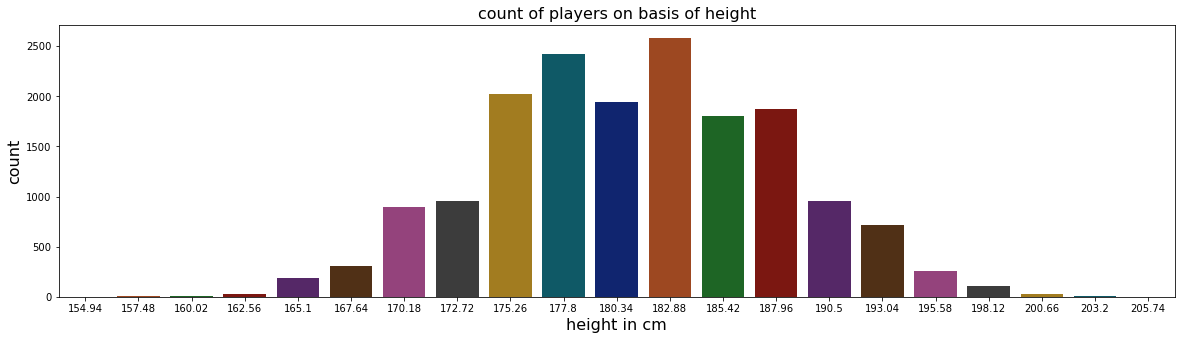

In [26]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'height_cm', data = df, palette = 'dark')
ax.set_title(label = 'count of players on basis of height', fontsize = 16)
ax.set_xlabel(xlabel = 'height in cm', fontsize = 16)
ax.set_ylabel(ylabel = 'count', fontsize = 16)
plt.show()

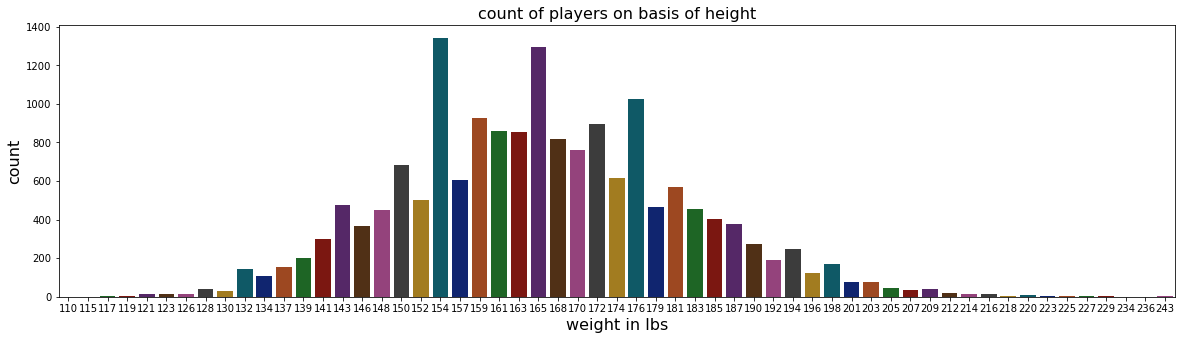

In [29]:
plt.figure(figsize = (20, 5))
ax = sns.countplot(x = 'weight_lbs', data = df, palette = 'dark')
ax.set_title(label = 'count of players on basis of height', fontsize = 16)
ax.set_xlabel(xlabel = 'weight in lbs', fontsize = 16)
ax.set_ylabel(ylabel = 'count', fontsize = 16)
plt.show()

## 4.3. check the correlation between height + weight

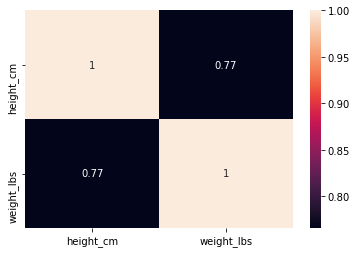

In [32]:
num_columns = df[['height_cm', 'weight_lbs']]
sns.heatmap(num_columns.corr(), annot=True)
plt.show()

**Answer 1:** There is a high correlation (0,77) between the height and the weight of the fifa players

# 5. QUESTION 2 MARKETING VALUE x NATIONALITY

**Are the most represented nationalities the ones with the greatest marketing value?**

## 5.1. filter the ten most frequent nationalities + put them into a dataframe 

In [33]:
top_country = df.nationality.value_counts().head(10).rename_axis('country').reset_index()
pd.DataFrame(top_country)

,country,nationality
0,England,1707
1,Germany,1154
2,Spain,1121
3,France,990
4,Brazil,857
5,Argentina,778
6,Italy,565
7,Netherlands,475
8,Portugal,365
9,United States,358


## 5.2. check the distribution of the most common nationalities 

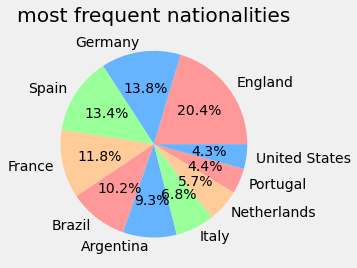

In [34]:
plt.style.use('fivethirtyeight')
x = top_country['nationality']
label = top_country["country"]
plt.title("most frequent nationalities")
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(x, radius=1, labels=label, autopct='%1.1f%%', colors=colors)
#ax.pie(..., radius=1800, frame=True)
plt.show()


the pie plot shows that out of the ten most frequent nationalities 20,4% of he players are from England and only 4,3% are from United States

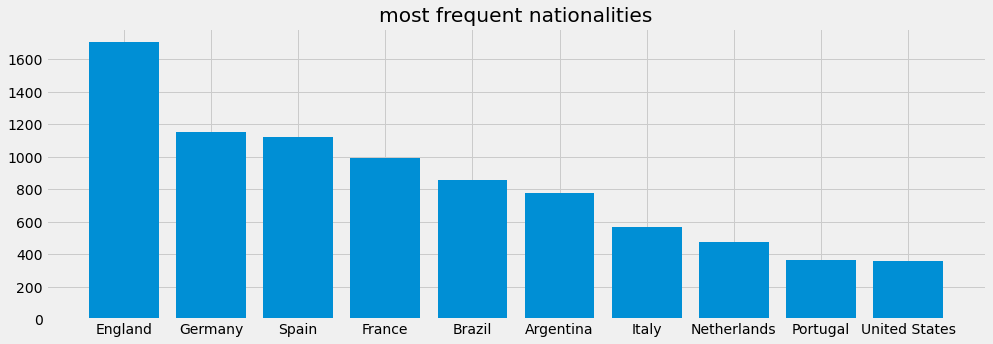

In [35]:

plt.figure(figsize = (15, 5))
bar_plot = dict(Counter(df['nationality'].values).most_common(10))
plt.bar(*zip(*bar_plot.items()))
plt.title("most frequent nationalities")
plt.show()

## 5.3. check the distribution of the marketing value from the different nationalities

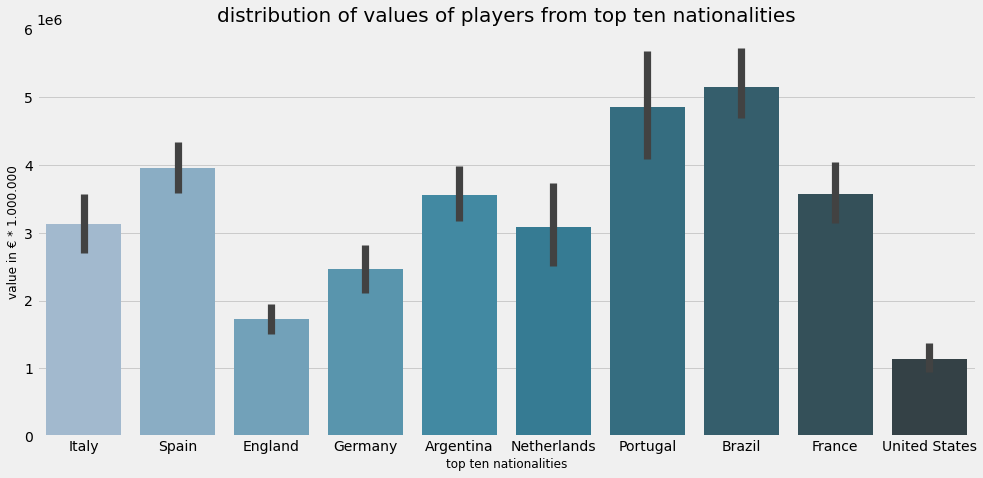

In [36]:
countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Netherlands', 'Portugal', 'United States')
data_country= df.loc[df['nationality'].isin(countries) & df['value_num']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_country['nationality'], y = data_country['value_num'], palette = 'PuBuGn_d')
ax.set_xlabel(xlabel = 'top ten nationalities', fontsize = 12)
ax.set_ylabel(ylabel = 'value in € * 1.000.000', fontsize = 12)
ax.set_title(label = 'distribution of values of players from top ten nationalities', fontsize = 20)
plt.show()

the three players with the highest value from the top ten most frequent nationalities are from France, Brazil and Spain

In [37]:
df2 = df.sort_values(by=['value_num'],  ascending = False)
df2.iloc[:3] 

,id,name,age,ova,nationality,club,bov,bp,position,pot,foot,growth,attacking,heading_accuracy,short_passing,skill,dribbling,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,a/w,d/w,pac,sho,pas,dri,def,phy,hits,weight_lbs,height_cm,value_num,wage_num,joined_year,contract_num
9331,231747,K. Mbappé,21,90,France,Paris Saint-Germain,91,ST,ST LW RW,95,Right,5,408,73,83,394,92,70,90,458,96,96,92.0,92,82.0,404,86,77.0,86,76,341,91.0,80.0,70,100,34,34,32.0,42,13,5,7,11,6,2147,466,High,Low,96,86,78,91,39,76,1.2K,161,177.80,105500000.0,160000.0,2018,4.0
2650,190871,Neymar Jr,28,91,Brazil,Paris Saint-Germain,91,LW,LW CAM,91,Right,0,408,62,87,448,95,81,95,453,94,89,96.0,91,83.0,357,80,62.0,81,50,356,87.0,90.0,92,94,35,30,29.0,59,9,9,15,15,11,2175,451,High,Medium,91,85,86,94,36,59,546,150,175.26,90000000.0,270000.0,2017,5.0
2871,192985,K. De Bruyne,29,91,Belgium,Manchester City,91,CAM,CAM CM,91,Right,0,407,55,94,441,88,93,92,398,77,76,78.0,91,76.0,408,91,63.0,89,74,408,88.0,94.0,84,186,68,65,53.0,56,15,13,5,10,13,2304,485,High,High,76,86,93,88,64,78,406,154,180.34,87000000.0,370000.0,2015,8.0


the three players with the highest market value are from France, Bazil an Belgium

**Answer 2:** The value is not inextricably linked with the frequency. Brazil makes up only 10,2% of the top ten nationalities, but is the nationalty with the highest marketing value out of the ten most frequent nationality. Out of the total nationalities there are 2 out of the ten most frequent, but one is from less frequent nationalities (Belgium). 

# 6. VISUALIZATION + EXPLORATION

## 6.1. drop more columns

from my point of view the columns are not as relevant as the others and so it makes the data set easier to handle

In [38]:
df_num = pd.DataFrame(df.select_dtypes(include = np.number).drop(['pac', "sho", "pas", "dri", "def", "phy", "positioning", "vision", 
"penalties", "defending", "marking", "standing_tackle", "sliding_tackle", "goalkeeping", "gk_diving", "gk_handling", 
"gk_kicking", "gk_positioning", "gk_reflexes", "total_stats", "base_stats"], axis=1))


## 6.2. check the frist rows and the shape after drop more columns 

In [39]:
df_num = pd.DataFrame(df.select_dtypes(include = np.number))
df_num.head()

,id,age,ova,bov,pot,growth,attacking,heading_accuracy,short_passing,skill,dribbling,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,weight_lbs,height_cm,value_num,wage_num,contract_num
0,2,33,69,71,69,0,313,59,71,338,73,69,71,347,68,74,68.000000,69,68.000000,347,74,68.000000,69,68,320,63.0,66.000000,50,208,70,69,69.000000,56,14,5,15,10,12,1929,408,71,59,70,71,68,69,181,182.88,625000.0,7000.0,8.000000
1,16,37,71,70,71,0,337,61,76,369,69,71,71,305,56,50,62.000000,65,72.000000,324,75,54.000000,64,60,362,72.0,73.000000,75,153,70,43,40.000000,56,9,12,13,11,11,1906,385,53,69,73,69,58,63,143,177.80,600000.0,7000.0,5.000000
2,27,33,71,71,71,0,337,41,77,387,79,69,78,295,48,42,71.000000,59,75.000000,284,72,58.000000,29,56,317,69.0,74.000000,66,99,35,34,30.000000,51,9,6,13,16,7,1770,354,45,68,76,77,36,52,161,175.26,1100000.0,15000.0,4.000000
3,36,36,68,70,82,14,264,60,80,255,68,64,77,176,59,62,64.602273,55,64.715591,239,63,65.170212,51,66,271,72.0,55.443605,70,75,34,41,46.099725,68,5,21,64,21,21,1348,369,61,66,66,69,47,60,165,180.34,0.0,0.0,3.521553
4,41,36,81,82,81,0,367,54,90,408,85,83,90,346,61,56,79.000000,75,75.000000,297,67,40.000000,58,62,370,78.0,93.000000,71,181,68,57,56.000000,45,6,13,6,13,7,2014,420,58,70,85,85,63,59,150,170.18,5500000.0,12000.0,3.000000


In [40]:
df_num.shape

(17125, 51)

##6.3. devide the dataframe into x/y obj/num and look at the head

In [41]:
y = df_num['value_num']
X = df_num.drop(['value_num'], axis=1)

In [42]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

drop **joined_year column** because to much value nulls

In [43]:
df_obj = pd.DataFrame(df.select_dtypes(include = np.object).drop(['joined_year'], axis=1))
df_obj.head()

,name,nationality,club,bp,position,foot,a/w,d/w,hits
0,G. Pasquale,Italy,Udinese,LWB,LM,Left,Medium,High,4
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,Right,Medium,Medium,4
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,Right,Medium,Low,11
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,df.position.value_counts().head(1),Right,df.position.value_counts().head(1),df.position.value_counts().head(1),3
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,Right,High,Medium,149


## 6.4. check out the correlation of the numeric data

In [44]:
X_num_matrix = df_num.corr()
X_num_matrix

,id,age,ova,bov,pot,growth,attacking,heading_accuracy,short_passing,skill,dribbling,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,mentality,positioning,vision,penalties,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,weight_lbs,height_cm,value_num,wage_num,contract_num
id,1.000000,-0.743844,-0.431079,-0.385713,0.042604,0.553757,-0.178002,-0.148036,-0.173987,-0.175488,-0.061919,-0.215201,-0.134706,0.062316,0.167381,0.170565,0.019099,-0.421033,0.038199,-0.224439,-0.279340,-0.141330,0.014947,-0.246480,-0.246674,-0.127740,-0.240620,-0.218133,-0.070775,-0.106629,-0.073895,-0.054644,-0.095273,-0.089003,-0.100717,-0.122380,-0.106509,-0.094745,-0.236634,-0.339341,0.175293,-0.284713,-0.366366,-0.232583,-0.165248,-0.295857,-0.196765,-0.079320,-0.094638,-0.222340,-0.086143
age,-0.743844,1.000000,0.517099,0.456734,-0.237619,-0.850204,0.183954,0.172793,0.176786,0.168876,0.039607,0.223088,0.121097,-0.055642,-0.186610,-0.180717,-0.041315,0.501010,-0.085504,0.310459,0.304947,0.196550,0.069741,0.350439,0.272976,0.122510,0.235359,0.198917,0.114796,0.155497,0.106178,0.085663,0.125933,0.120891,0.125251,0.130810,0.134369,0.121822,0.280383,0.414897,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462,0.258682,0.092935,0.095981,0.200851,0.081787
ova,-0.431079,0.517099,1.000000,0.985877,0.592268,-0.595585,0.431238,0.305553,0.492372,0.441689,0.350249,0.482655,0.431284,0.302267,0.143928,0.153476,0.226127,0.870084,0.100438,0.546417,0.534829,0.258627,0.335108,0.338347,0.495097,0.339672,0.505168,0.317666,0.248247,0.290071,0.237478,0.208920,0.038222,0.037851,0.037993,0.038650,0.044653,0.037284,0.607676,0.832618,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354,0.151834,0.027077,0.631679,0.592925,0.241019
bov,-0.385713,0.456734,0.985877,1.000000,0.628323,-0.542890,0.464329,0.335677,0.533046,0.473888,0.388163,0.515422,0.471454,0.335011,0.179547,0.189491,0.254781,0.870157,0.127728,0.572275,0.550932,0.262992,0.368788,0.335436,0.523526,0.368071,0.527542,0.340311,0.267770,0.309674,0.257583,0.227278,-0.008702,-0.008851,-0.008312,-0.006124,-0.000933,-0.008819,0.635037,0.830127,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579,0.132560,0.015950,0.640818,0.592453,0.244123
pot,0.042604,-0.237619,0.592268,0.628323,1.000000,0.294499,0.233866,0.137199,0.318544,0.265503,0.264651,0.283647,0.292414,0.258243,0.197884,0.197396,0.189332,0.471139,0.131481,0.221586,0.266902,0.075942,0.170122,0.030991,0.243646,0.191910,0.304512,0.147044,0.138748,0.147320,0.138787,0.128934,-0.007277,-0.005874,-0.005240,-0.002734,-0.004015,-0.005215,0.329178,0.474763,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959,-0.039809,-0.021094,0.563570,0.462235,0.214904
growth,0.553757,-0.850204,-0.595585,-0.542890,0.294499,1.000000,-0.278316,-0.225620,-0.266404,-0.259171,-0.151568,-0.289670,-0.220001,-0.101046,0.026576,0.014764,-0.079442,-0.562259,0.011956,-0.427168,-0.368246,-0.231034,-0.227850,-0.370401,-0.344307,-0.211542,-0.295569,-0.230172,-0.156108,-0.197168,-0.143297,-0.119249,-0.052589,-0.050750,-0.050286,-0.048566,-0.056963,-0.049419,-0.392559,-0.514210,0.019730,-0.333941,-0.434753,-0.319487,-0.239034,-0.484974,-0.219772,-0.053145,-0.187347,-0.242411,-0.071610
attacking,-0.178002,0.183954,0.431238,0.464329,0.233866,-0.278316,1.000000,0.702717,0.881208,0.928429,0.914914,0.729337,0.934966,0.694473,0.594912,0.588417,0.640559,0.444720,0.541688,0.823755,0.710188,0.184330,0.669164,0.134714,0.887838,0.907957,0.719344,0.838585,0.313363,0.342181,0.308756,0.270156,-0.768449,-0.759377,-0.759492,-0.745473,-0.755959,-0.760922,0.903393,0.428602,0.180335,0.351248,0.373439,0.381863,0.106978,0.104102,-0.258559,-0.354000,0.289886,0.288541,0.040329
heading_accuracy,-0.148036,0.172793,0.305553,0.335677,0.137199,-0.225620,0.702717,1.000000,0.630927,0.528846,0.530891,0.480717,0.639628,0.283030,0.255933,0

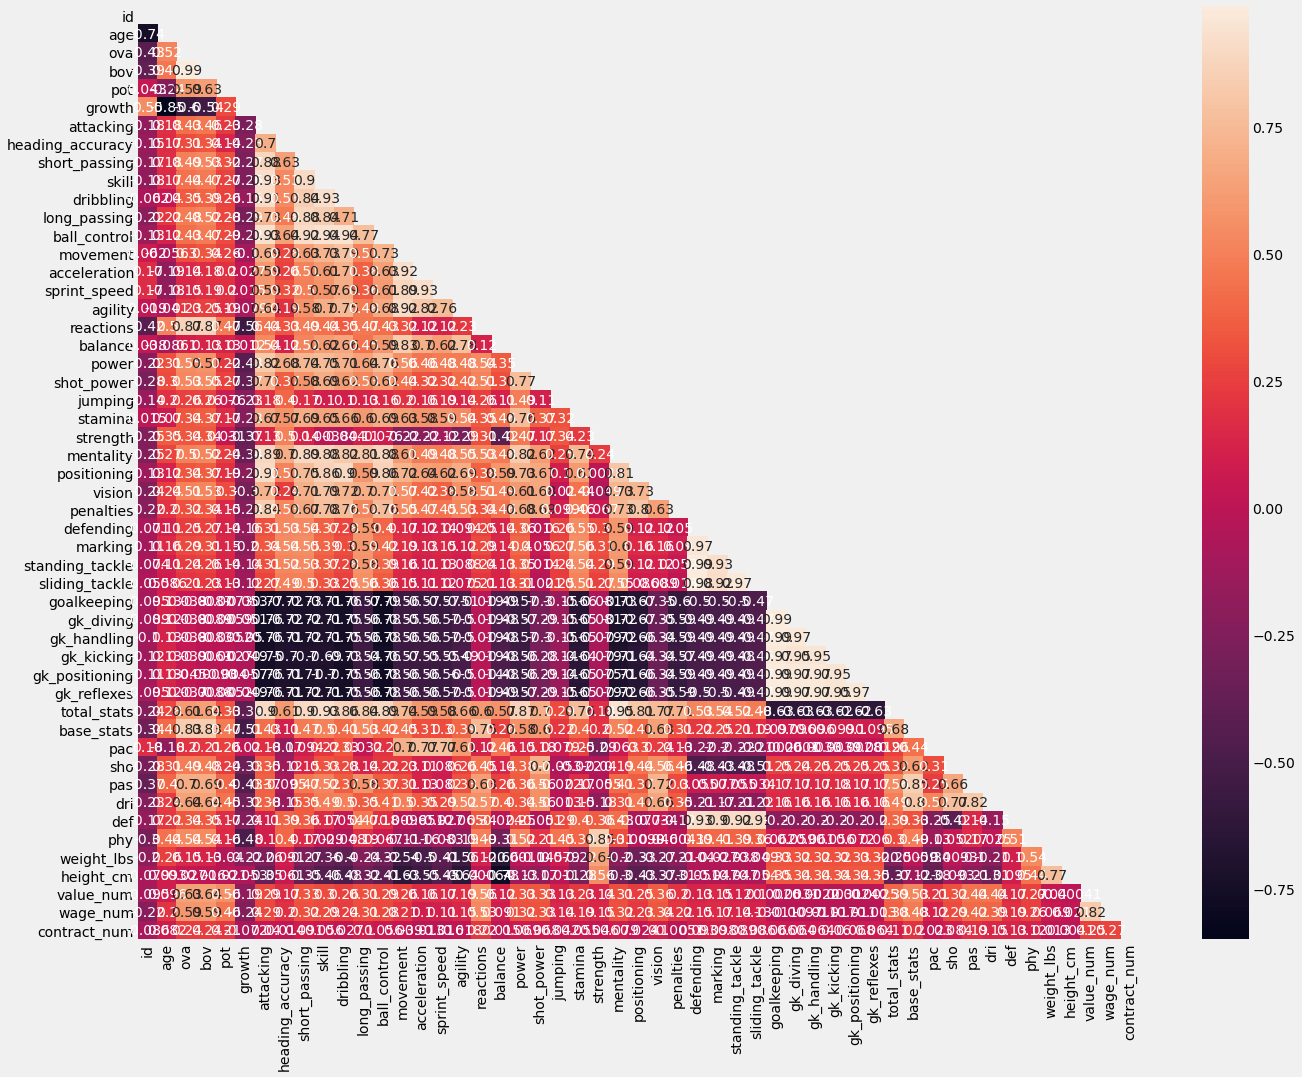

In [47]:
mask = np.zeros_like(X_num_matrix)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(X_num_matrix, mask=mask, annot=True)

plt.show()

In [48]:
y = df_num['value_num']
x = df_num.drop(['value_num'], axis=1)
x = sm.add_constant(x)
x_num = x.select_dtypes(include = np.number)
x_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())

# R-squared 0,753

                            OLS Regression Results                            
Dep. Variable:              value_num   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:55:21   Log-Likelihood:            -2.7770e+05
No. Observations:               17125   AIC:                         5.555e+05
Df Residuals:                   17078   BIC:                         5.559e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.021e+07   1.22e+06  

# 7. PROCESSING

## 7.1.dealing with outliers

check the outliers with a boxplot

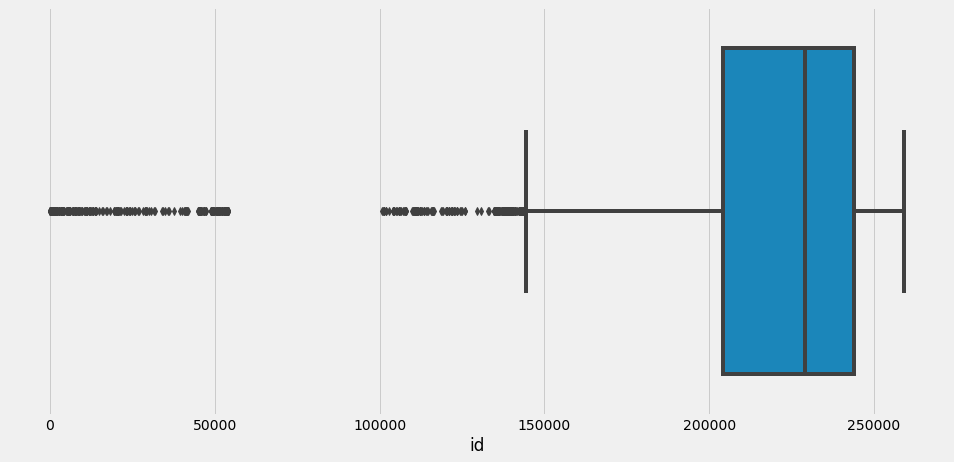

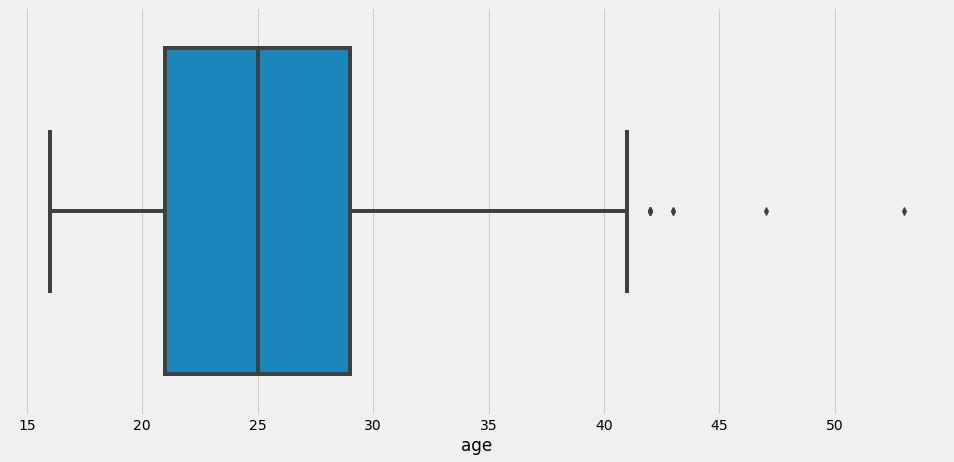

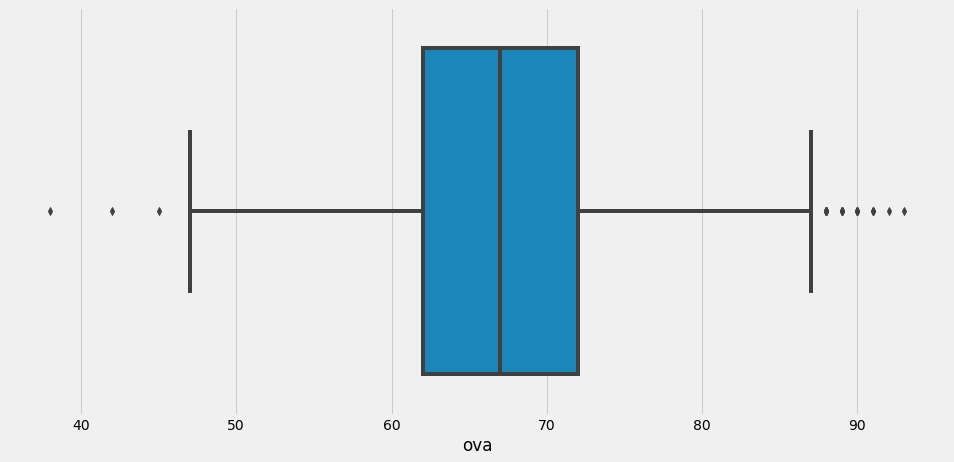

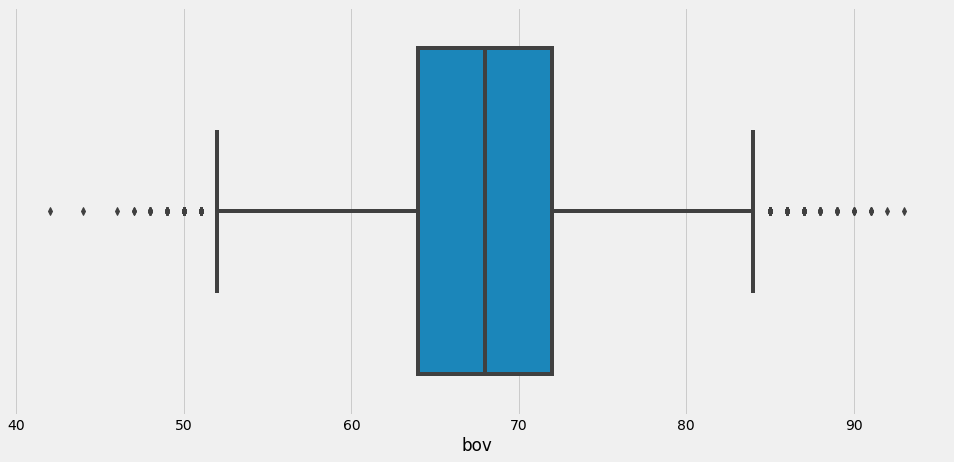

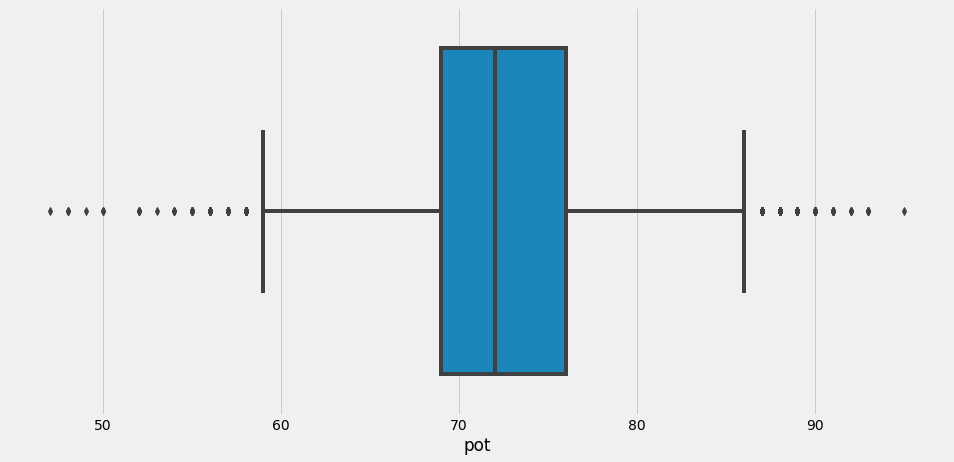

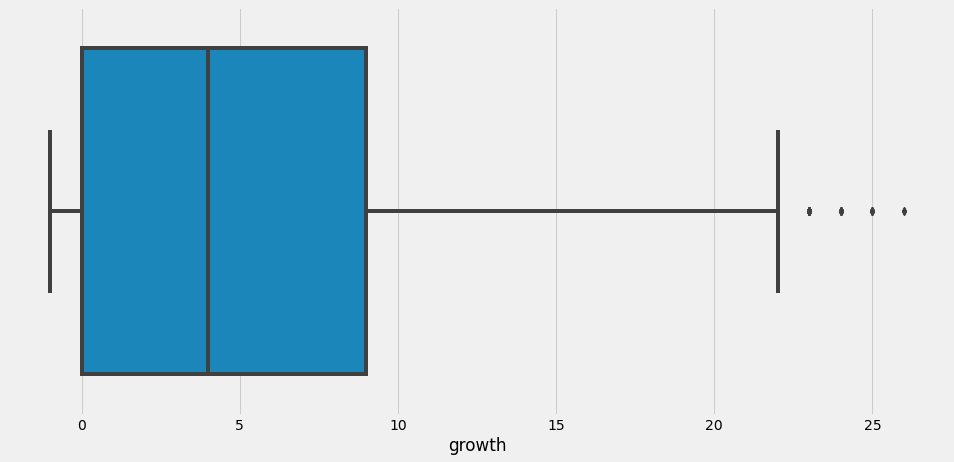

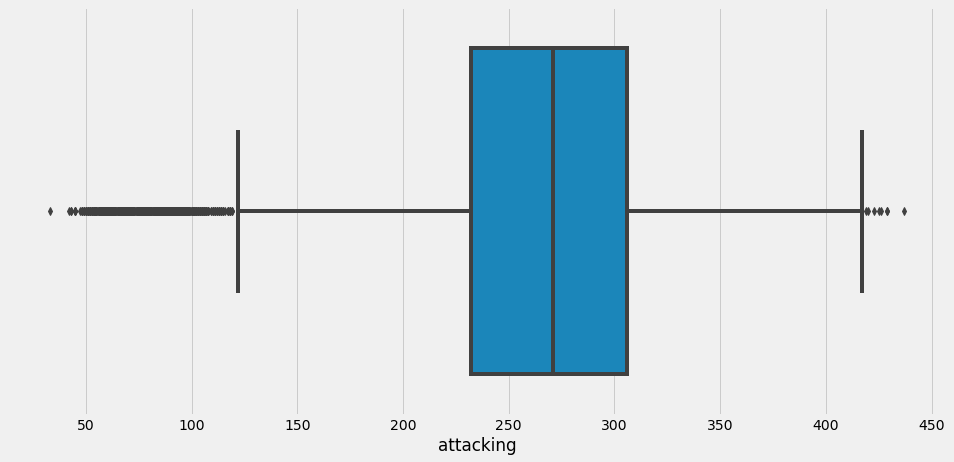

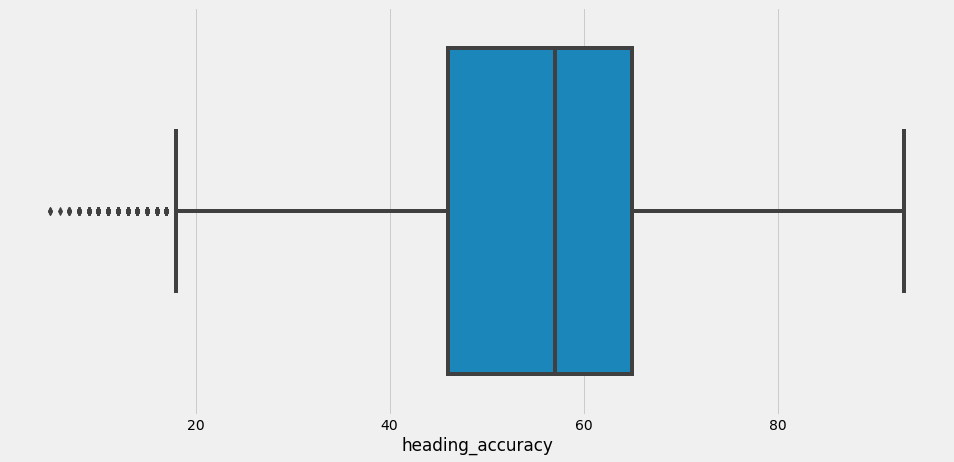

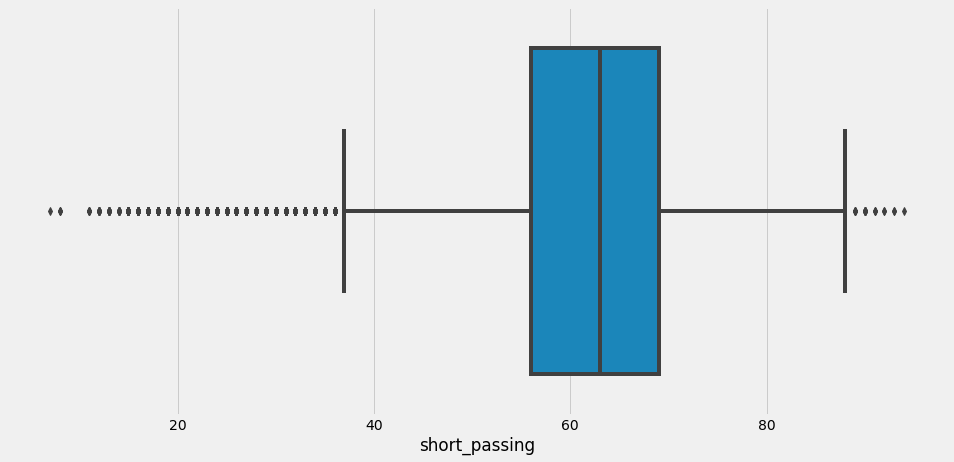

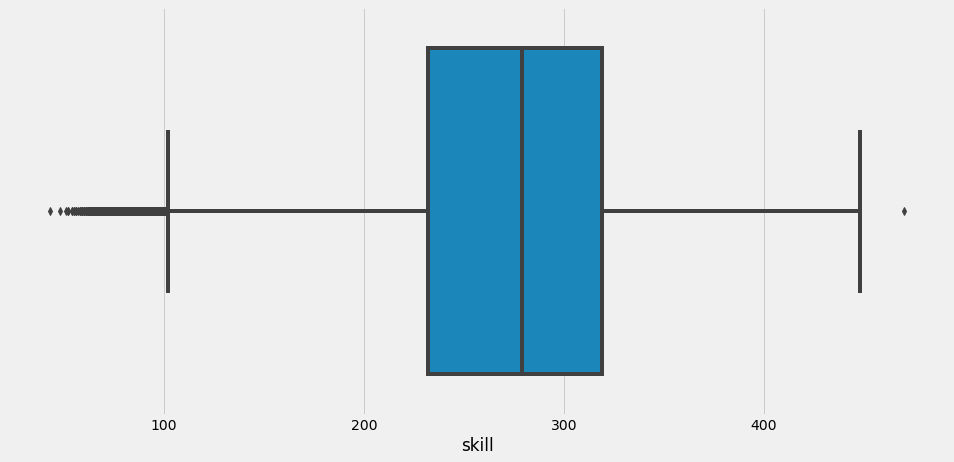

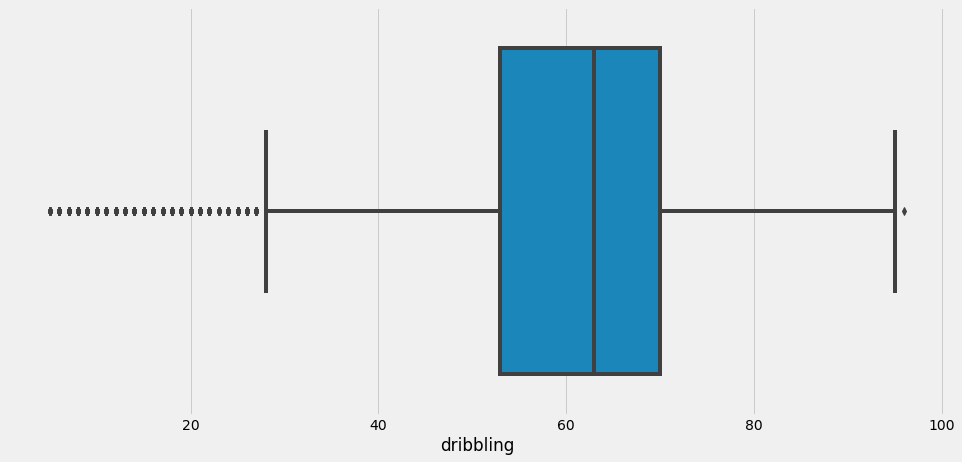

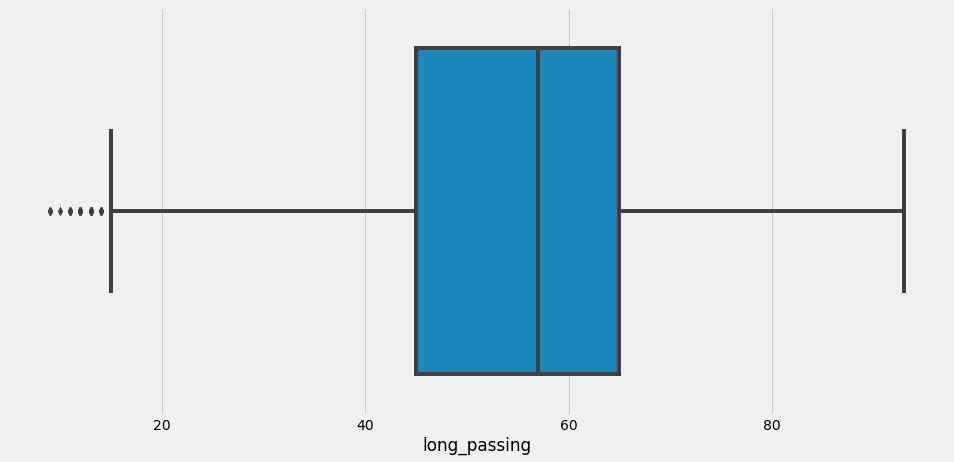

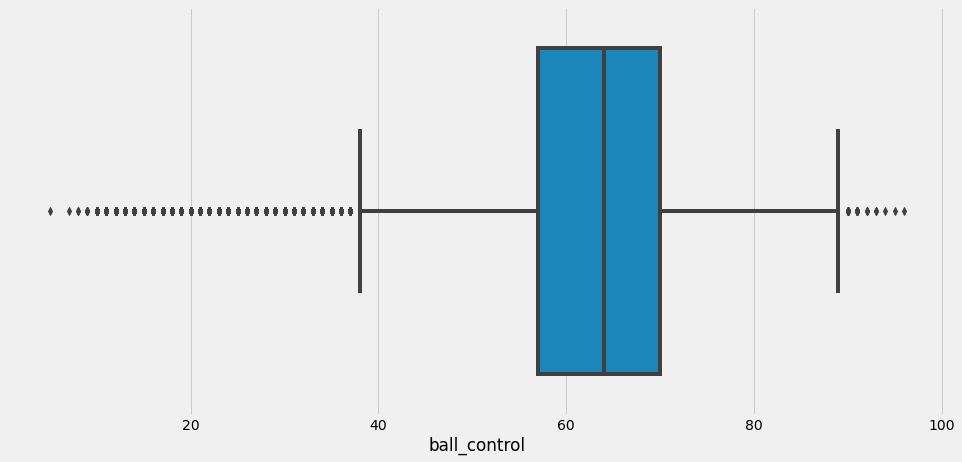

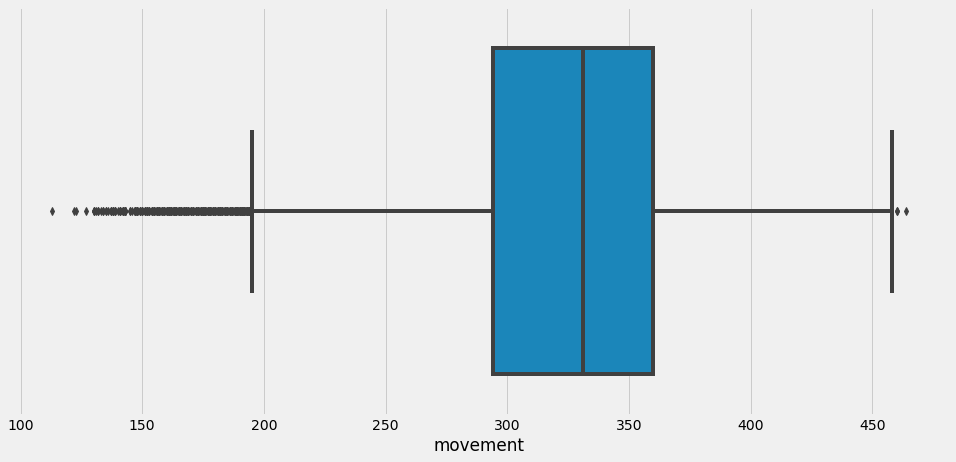

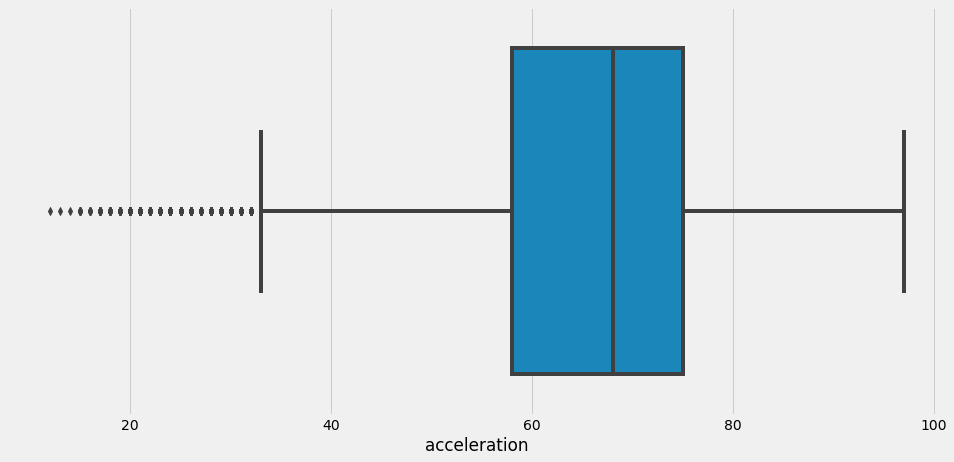

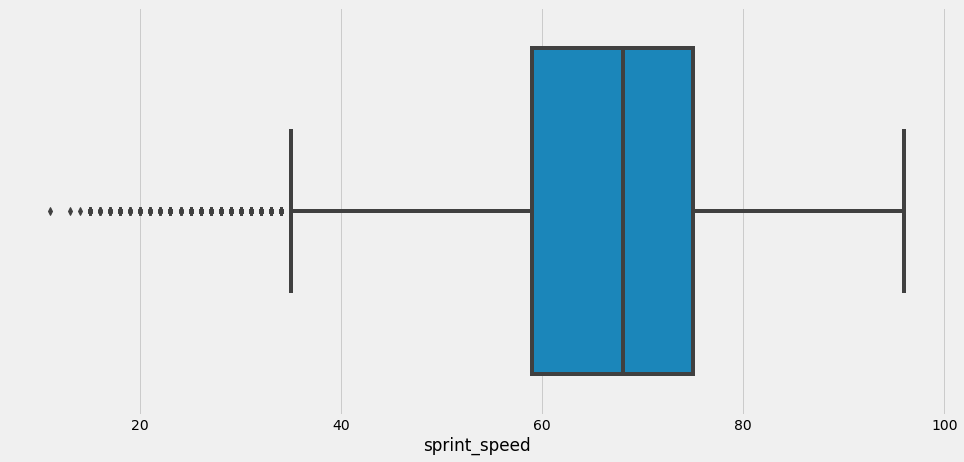

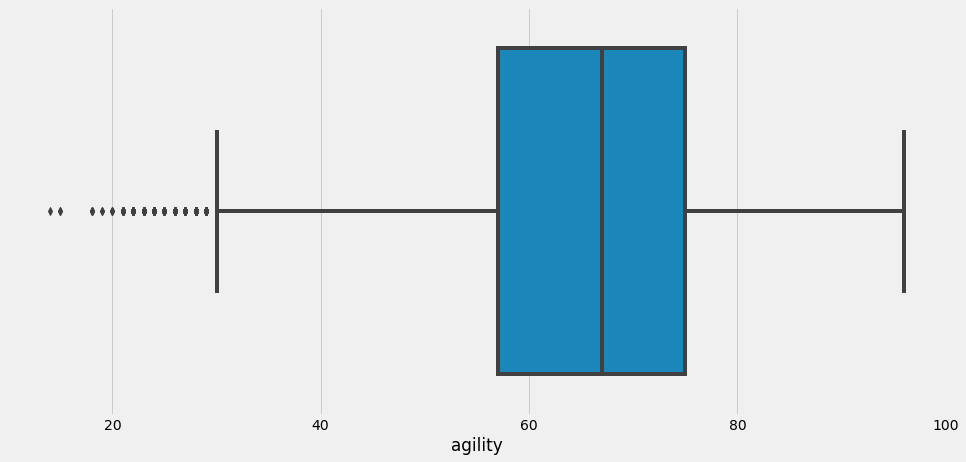

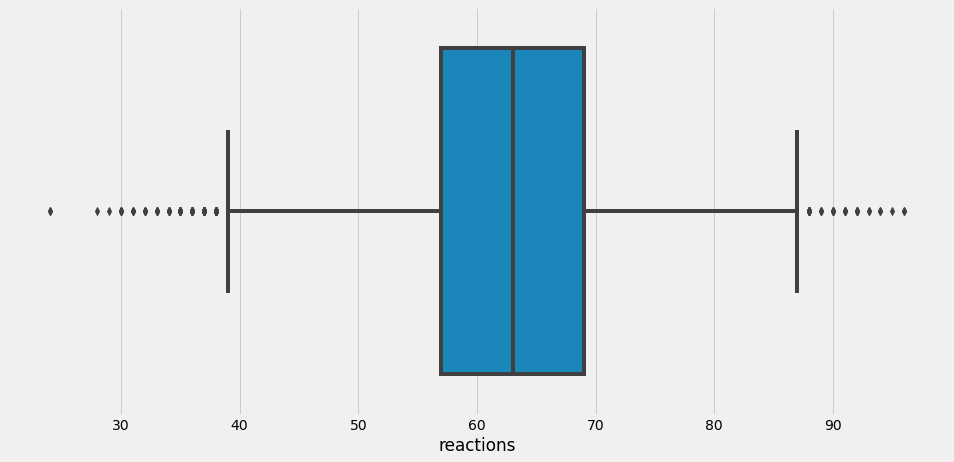

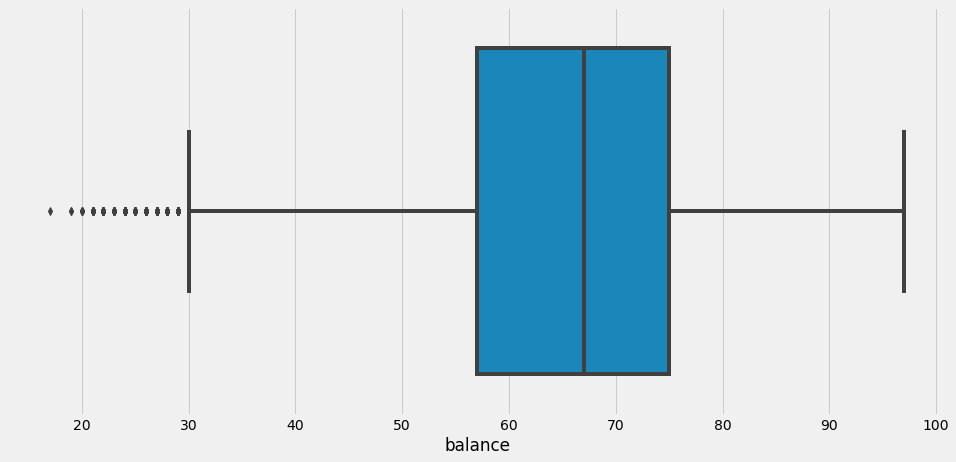

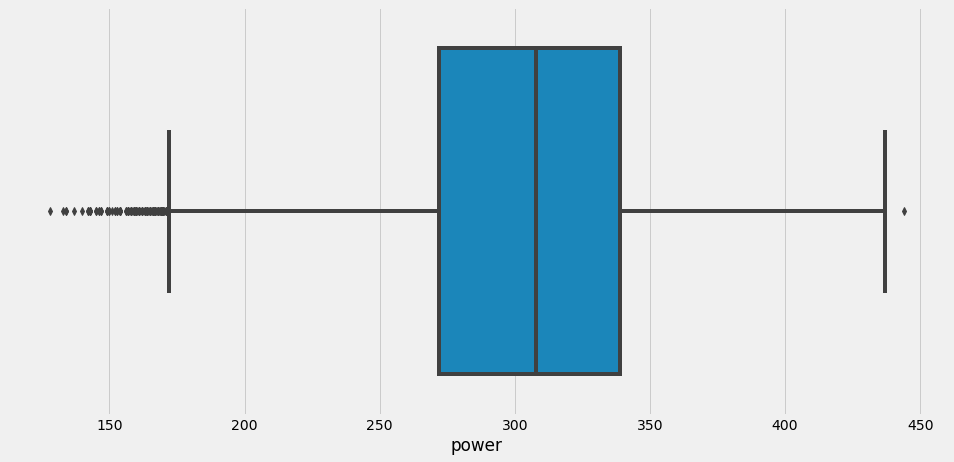

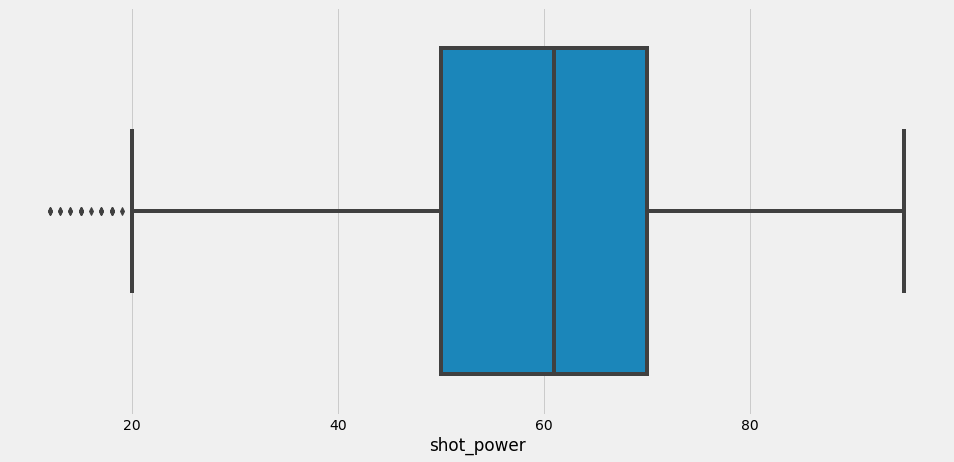

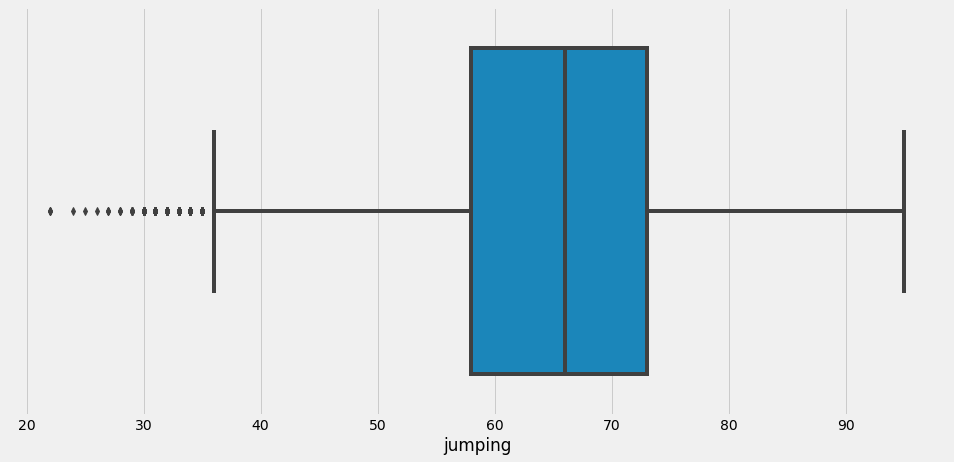

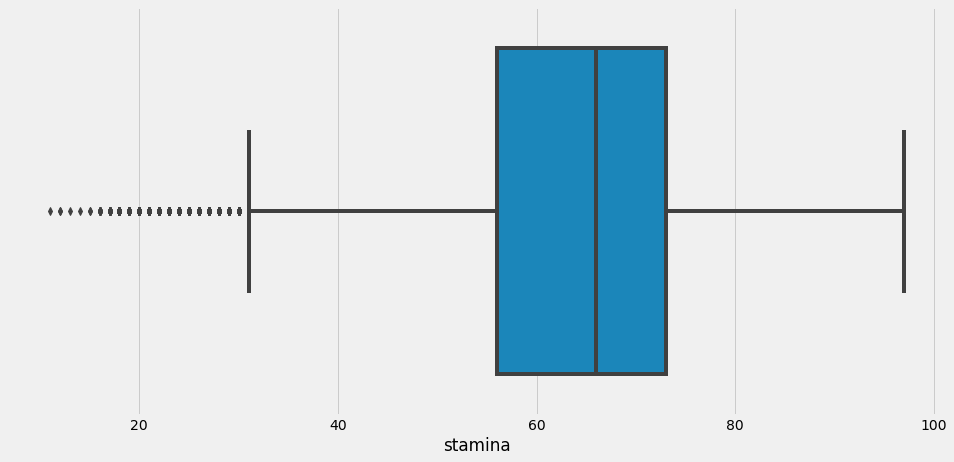

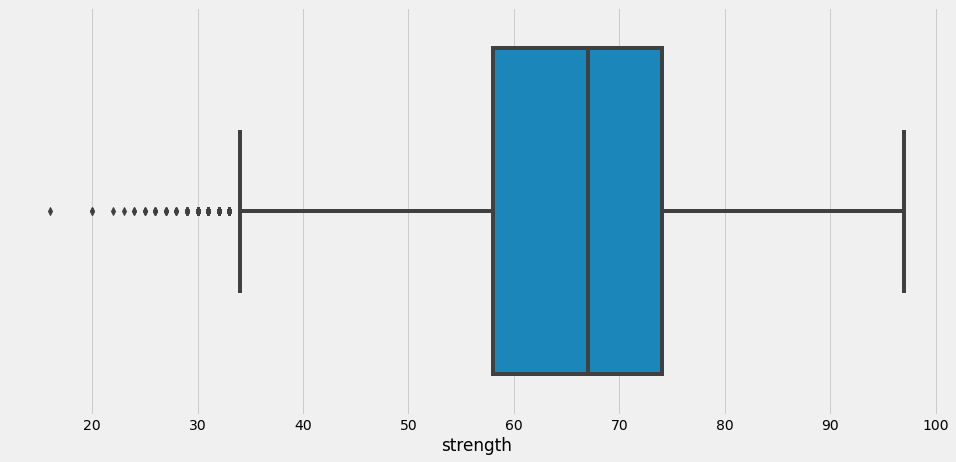

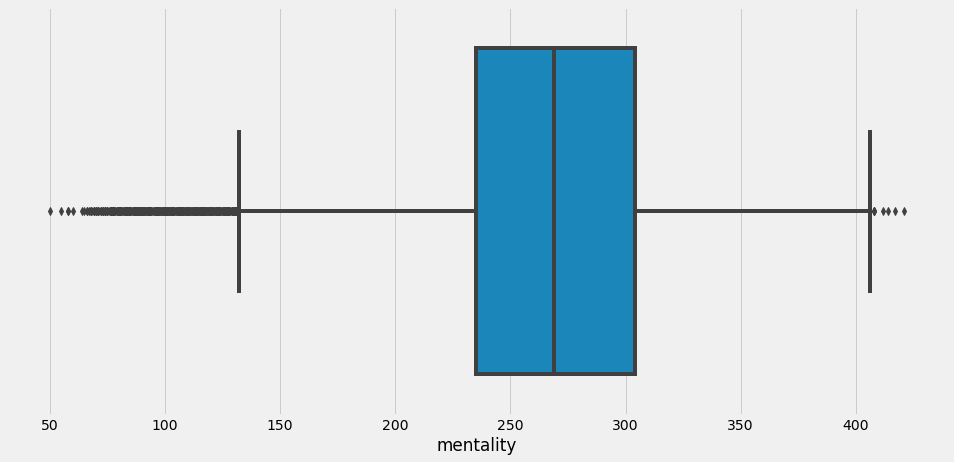

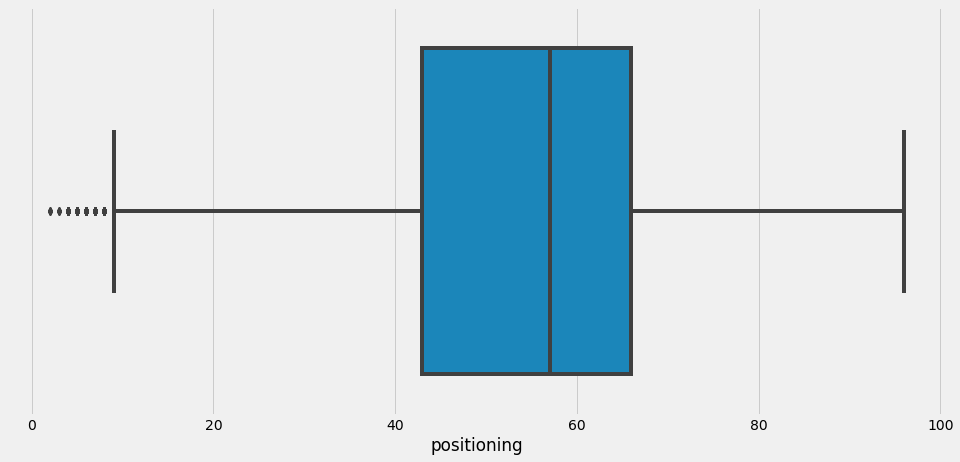

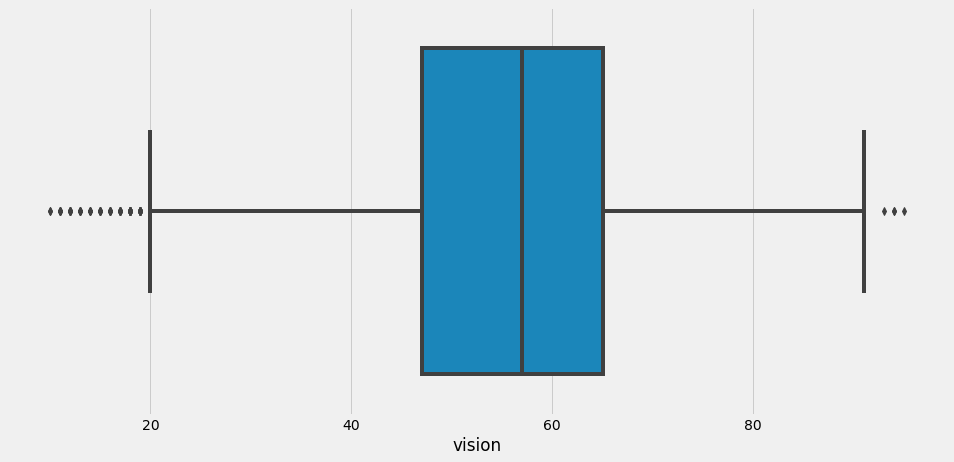

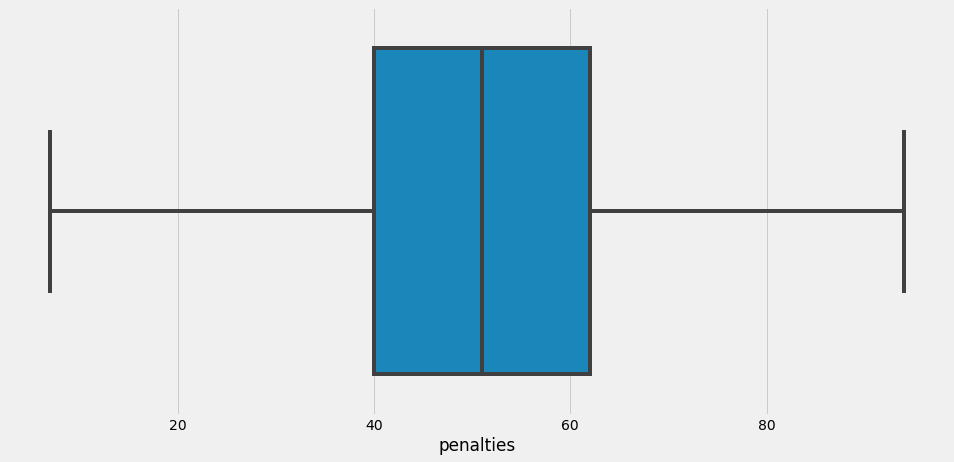

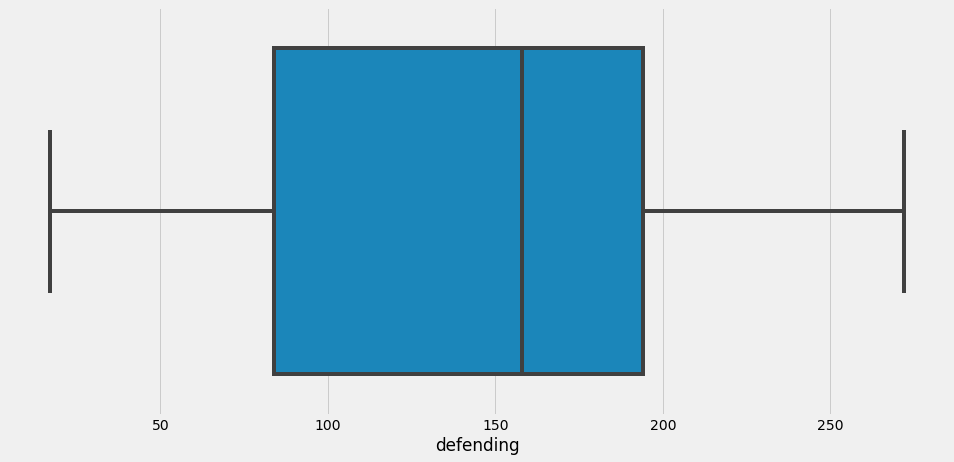

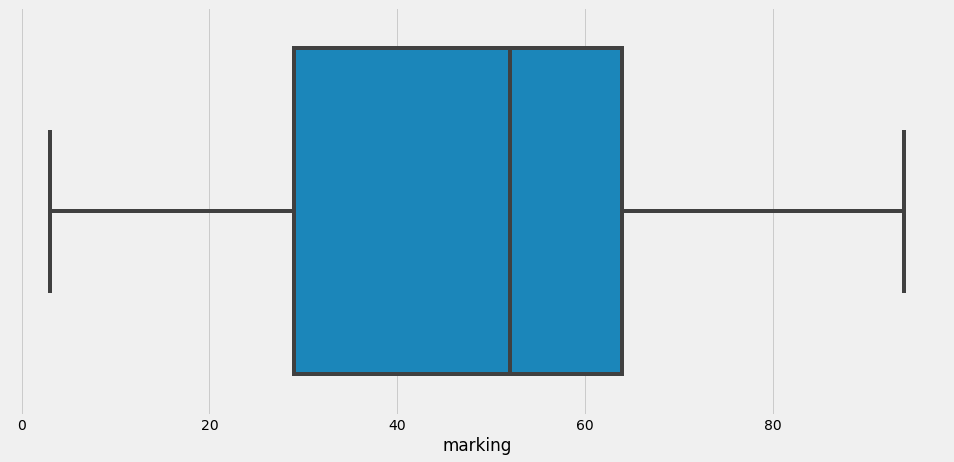

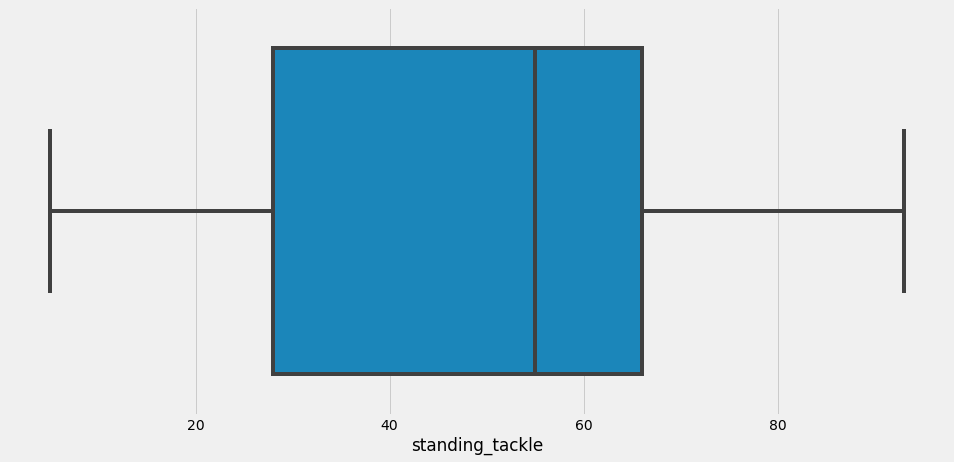

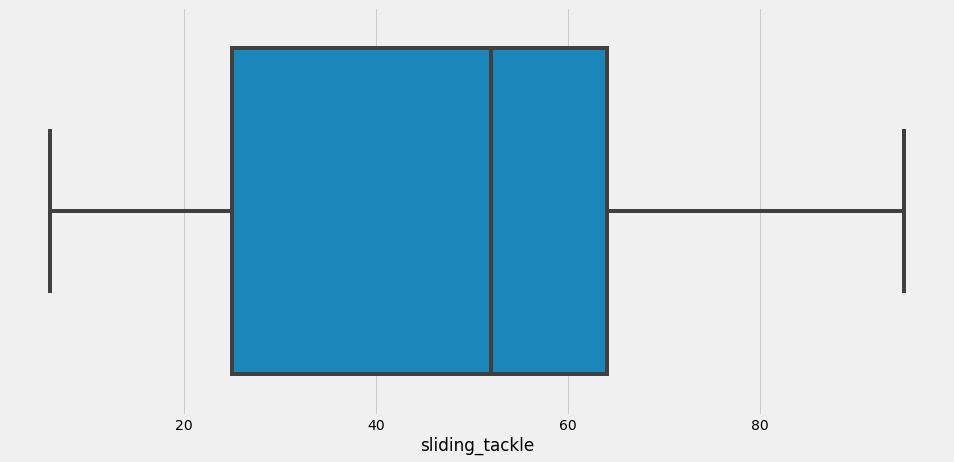

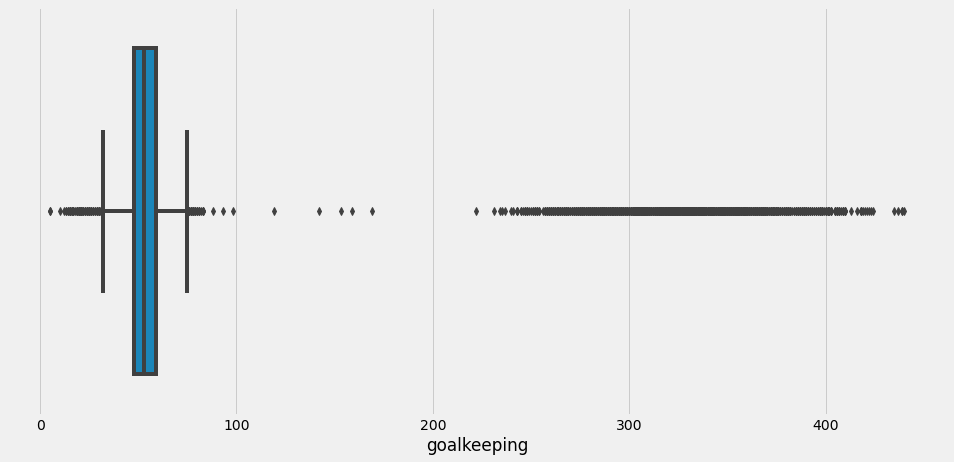

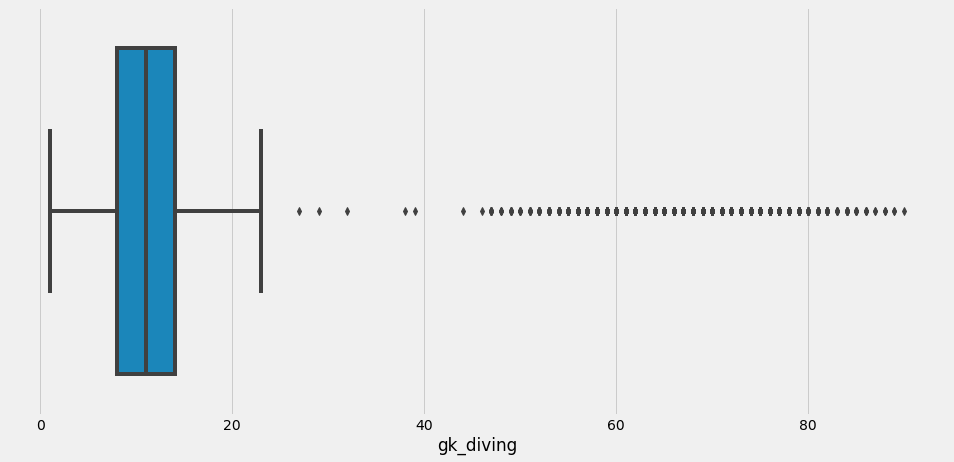

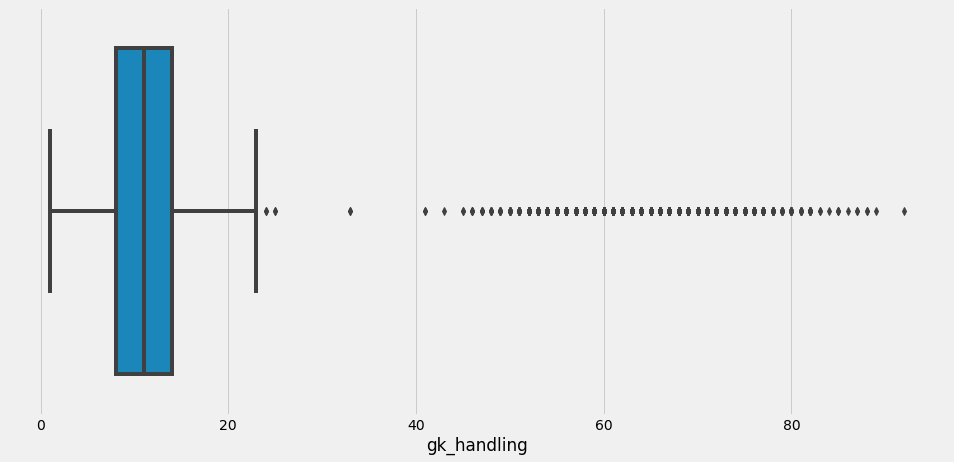

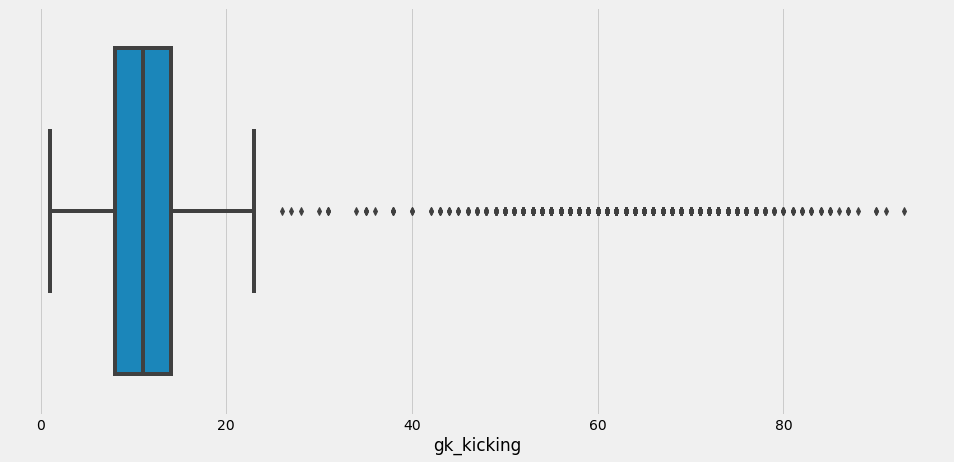

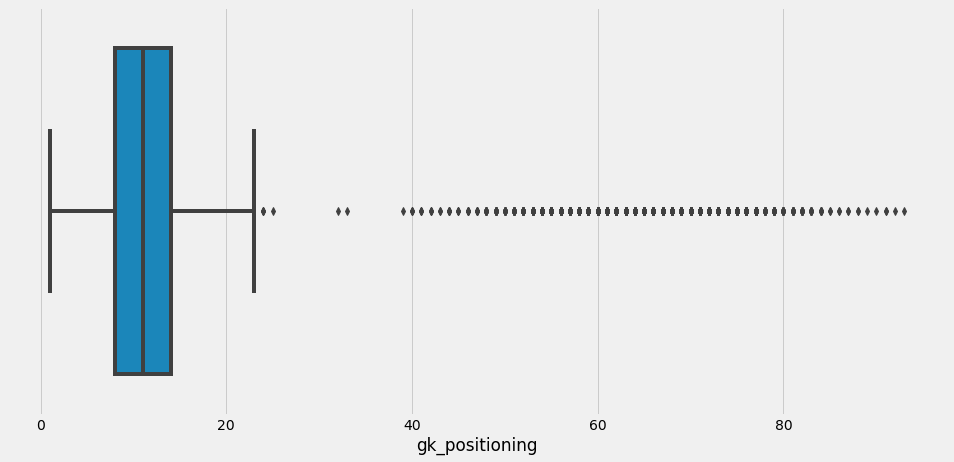

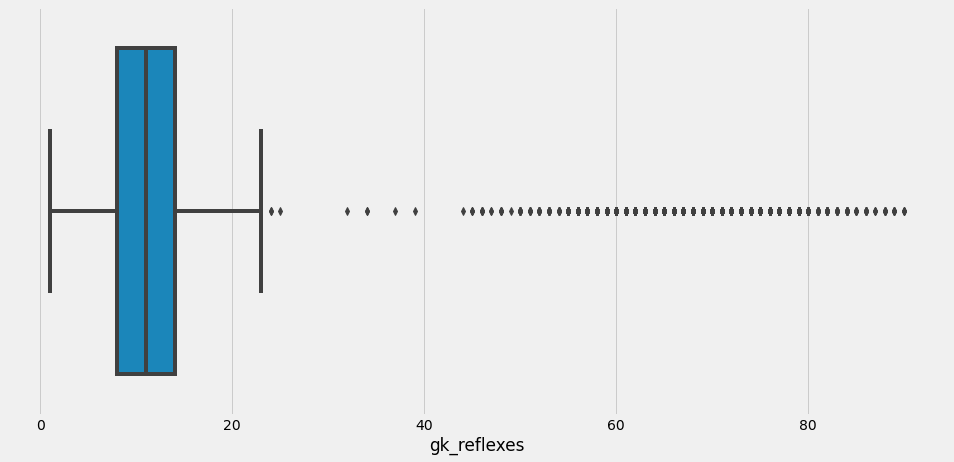

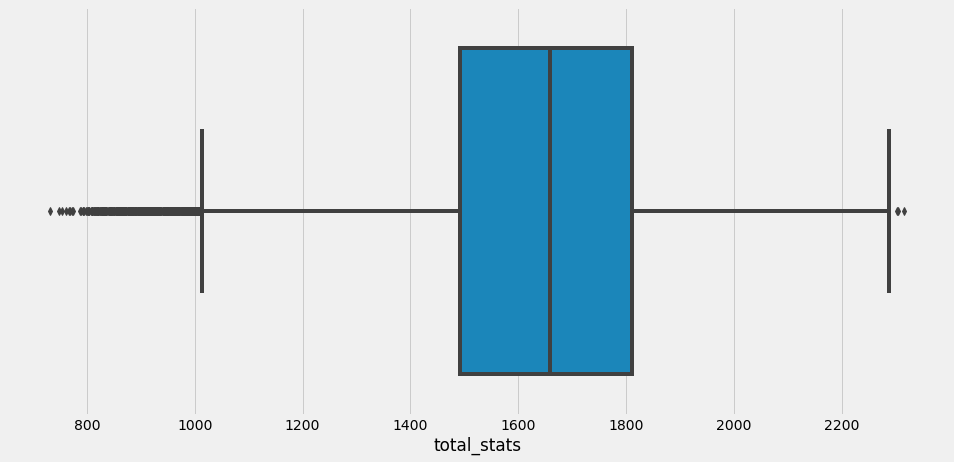

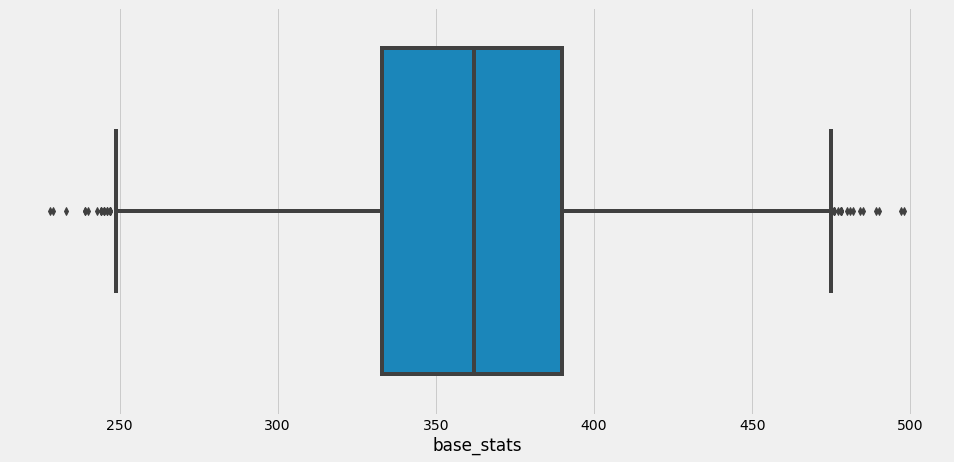

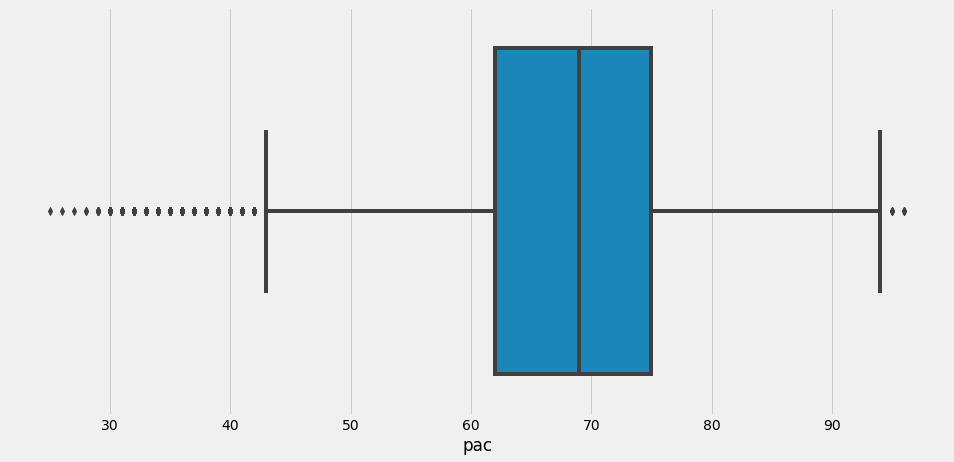

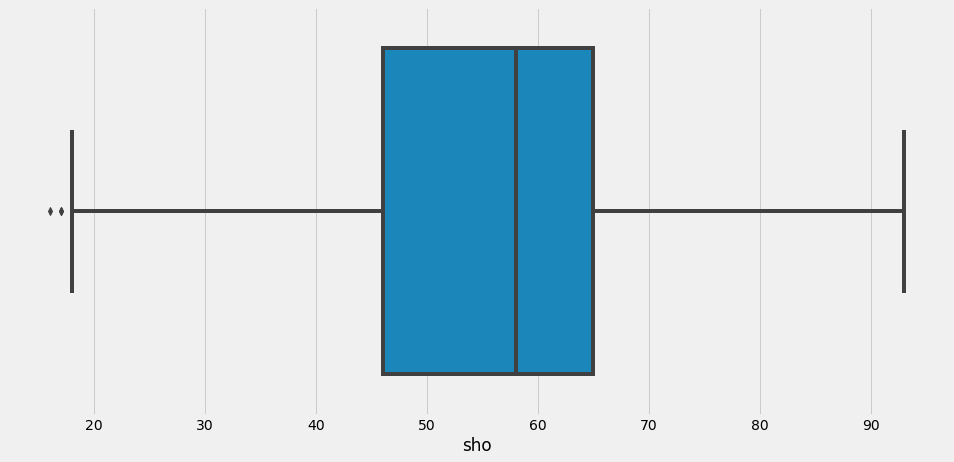

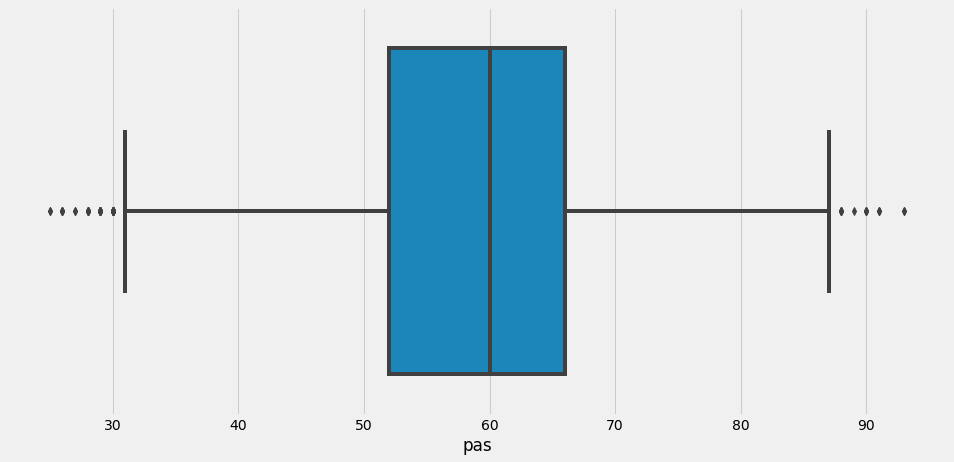

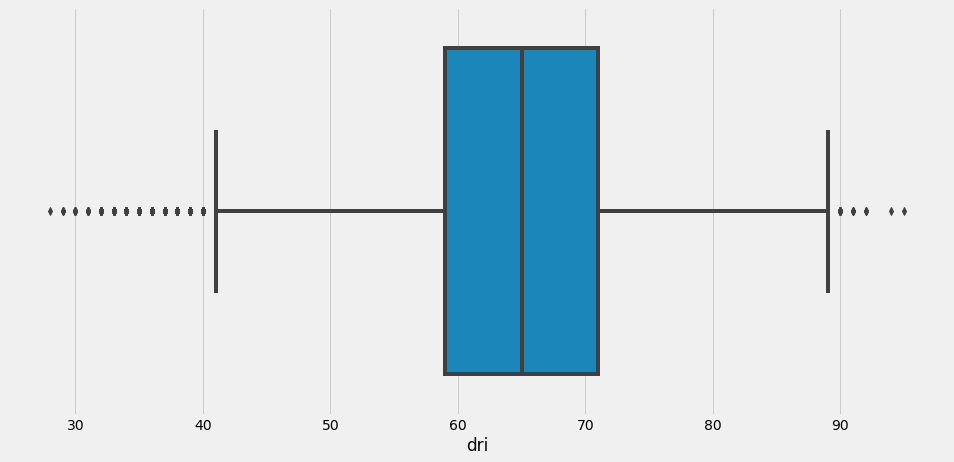

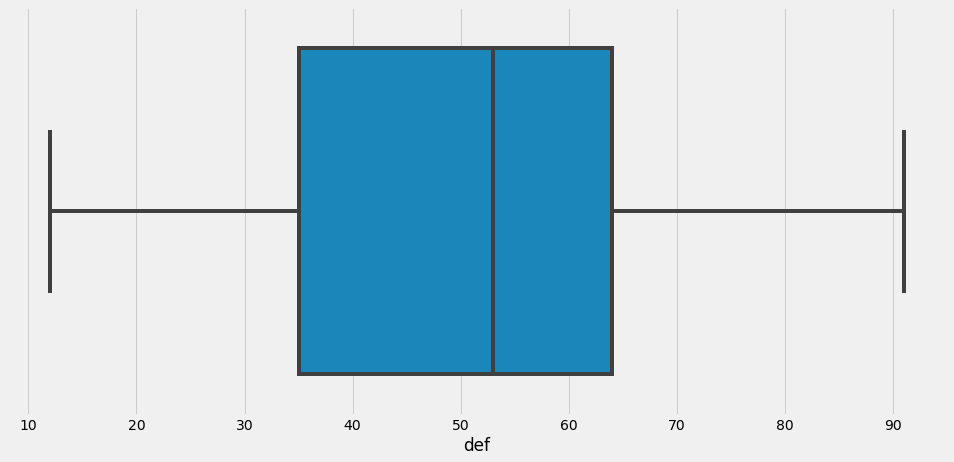

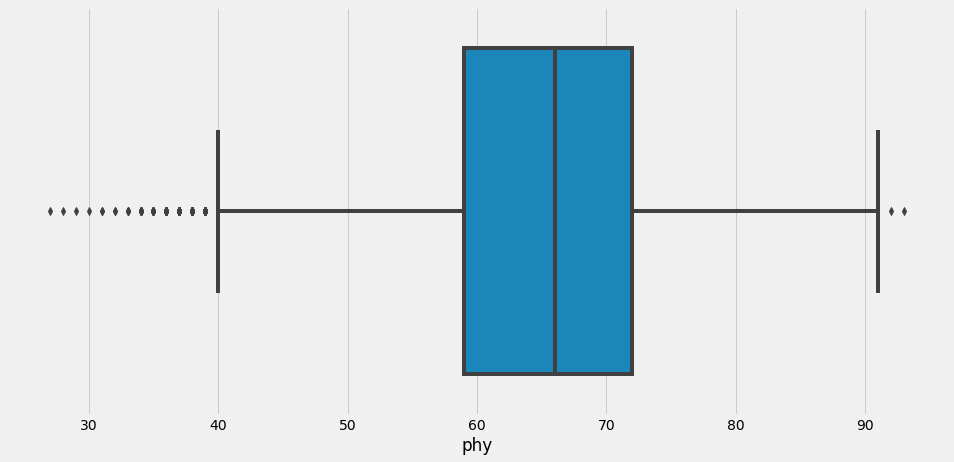

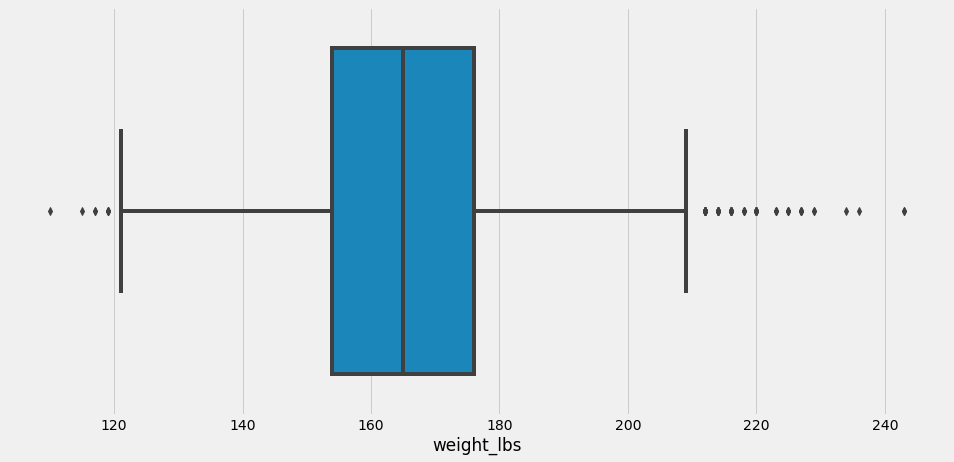

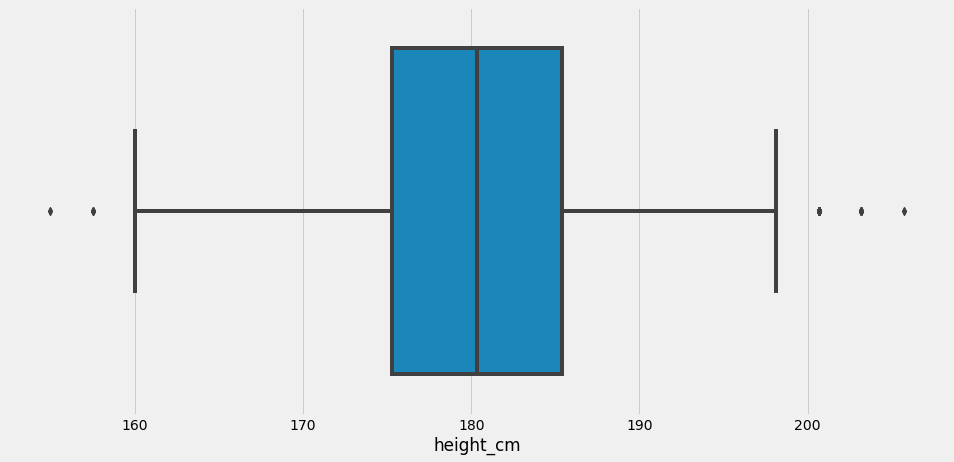

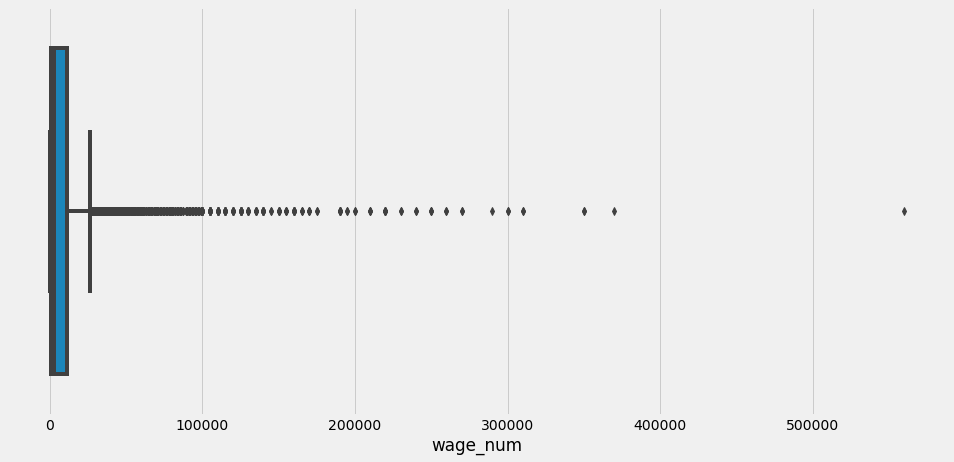

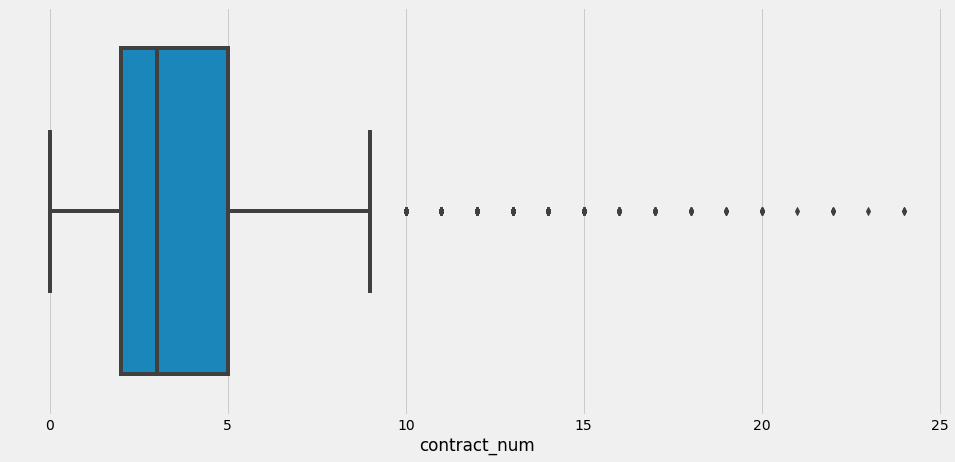

In [49]:
for column in df_num.columns.drop("value_num"):
    sns.boxplot(df_num[column])
    plt.show()

delete the outliers

In [50]:
iqr_list = []

for column in df_num.columns:
    iqr = np.percentile(df_num[column],75) - np.percentile(df_num[column],25) 
    iqr_list.append(iqr)

iqr_list = [round(i,2) for i in iqr_list]
print(iqr_list)

[39829.0, 8.0, 10.0, 8.0, 7.0, 9.0, 74.0, 19.0, 13.0, 87.0, 17.0, 20.0, 13.0, 66.0, 17.0, 16.0, 18.0, 12.0, 18.0, 67.0, 20.0, 15.0, 17.0, 16.0, 69.0, 23.0, 18.0, 22.0, 110.0, 35.0, 38.0, 39.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 320.0, 57.0, 13.0, 19.0, 14.0, 12.0, 29.0, 13.0, 22.0, 10.16, 2025000.0, 10000.0, 3.0]


In [51]:
upper_limit_list = []
lower_limit_list = []

for column in df_num.columns: 
    upper_limit = np.percentile(df[column],75) + 1.5*iqr
    upper_limit_list.append(upper_limit)
    lower_limit = np.percentile(df[column],25) - 1.5*iqr
    lower_limit_list.append(lower_limit)

upper_limit_list = [round(i,2) for i in upper_limit_list]  
lower_limit_list = [round(i,2) for i in lower_limit_list]    
    
print("upper_limit:" ,upper_limit_list) 
print("lower_limit:", lower_limit_list)

upper_limit: [243915.5, 33.5, 76.5, 76.5, 80.5, 13.5, 310.5, 69.5, 73.5, 323.5, 74.5, 69.5, 74.5, 364.5, 79.5, 79.5, 79.5, 73.5, 79.5, 343.5, 74.5, 77.5, 77.5, 78.5, 308.5, 70.5, 69.5, 66.5, 198.5, 68.5, 70.5, 68.5, 63.5, 18.5, 18.5, 18.5, 18.5, 18.5, 1816.5, 394.5, 79.5, 69.5, 70.5, 75.5, 68.5, 76.5, 180.5, 189.92, 2400004.5, 11004.5, 9.5]
lower_limit: [204077.5, 16.5, 57.5, 59.5, 64.5, -4.5, 227.5, 41.5, 51.5, 227.5, 48.5, 40.5, 52.5, 289.5, 53.5, 54.5, 52.5, 52.5, 52.5, 267.5, 45.5, 53.5, 51.5, 53.5, 230.5, 38.5, 42.5, 35.5, 79.5, 24.5, 23.5, 20.5, 43.5, 3.5, 3.5, 3.5, 3.5, 3.5, 1487.5, 328.5, 57.5, 41.5, 47.5, 54.5, 30.5, 54.5, 149.5, 170.76, 374995.5, 995.5, -2.5]


In [52]:
df_num = df_num[(df_num['id']>lower_limit_list[0]) & (df_num['id']<upper_limit_list[0])]
df_num = df_num[(df_num['age']>lower_limit_list[1]) & (df_num['age']<upper_limit_list[1])]
df_num = df_num[(df_num['ova']>lower_limit_list[2]) & (df_num['ova']<upper_limit_list[2])]
df_num = df_num[(df_num['bov']>lower_limit_list[3]) & (df_num['bov']<upper_limit_list[3])]
df_num = df_num[(df_num['pot']>lower_limit_list[4]) & (df_num['pot']<upper_limit_list[4])]
df_num = df_num[(df_num['growth']>lower_limit_list[5]) & (df_num['growth']<upper_limit_list[5])]
df_num = df_num[(df_num['attacking']>lower_limit_list[6]) & (df_num['attacking']<upper_limit_list[6])]
df_num = df_num[(df_num['heading_accuracy']>lower_limit_list[7]) & (df_num['heading_accuracy']<upper_limit_list[7])]
df_num = df_num[(df_num['short_passing']>lower_limit_list[8]) & (df_num['short_passing']<upper_limit_list[8])]
df_num = df_num[(df_num['skill']>lower_limit_list[9]) & (df_num['skill']<upper_limit_list[9])]
df_num = df_num[(df_num['dribbling']>lower_limit_list[10]) & (df_num['dribbling']<upper_limit_list[10])]
df_num = df_num[(df_num['long_passing']>lower_limit_list[11]) & (df_num['long_passing']<upper_limit_list[11])]
df_num = df_num[(df_num['ball_control']>lower_limit_list[12]) & (df_num['ball_control']<upper_limit_list[12])]
df_num = df_num[(df_num['movement']>lower_limit_list[13]) & (df_num['movement']<upper_limit_list[13])]
df_num = df_num[(df_num['acceleration']>lower_limit_list[14]) & (df_num['acceleration']<upper_limit_list[14])]
df_num = df_num[(df_num['sprint_speed']>lower_limit_list[15]) & (df_num['sprint_speed']<upper_limit_list[15])]
df_num = df_num[(df_num['agility']>lower_limit_list[16]) & (df_num['agility']<upper_limit_list[16])]
df_num = df_num[(df_num['reactions']>lower_limit_list[17]) & (df_num['reactions']<upper_limit_list[17])]
df_num = df_num[(df_num['balance']>lower_limit_list[18]) & (df_num['balance']<upper_limit_list[18])]

In [53]:
df_num = df_num[(df_num['power']>lower_limit_list[19]) & (df_num['power']<upper_limit_list[19])]
df_num = df_num[(df_num['shot_power']>lower_limit_list[20]) & (df_num['shot_power']<upper_limit_list[20])]
df_num = df_num[(df_num['jumping']>lower_limit_list[21]) & (df_num['jumping']<upper_limit_list[21])]
df_num = df_num[(df_num['stamina']>lower_limit_list[22]) & (df_num['stamina']<upper_limit_list[22])]
df_num = df_num[(df_num['strength']>lower_limit_list[23]) & (df_num['strength']<upper_limit_list[23])]
df_num = df_num[(df_num['mentality']>lower_limit_list[24]) & (df_num['mentality']<upper_limit_list[24])]
df_num = df_num[(df_num['weight_lbs']>lower_limit_list[26]) & (df_num['weight_lbs']<upper_limit_list[26])]
df_num = df_num[(df_num['height_cm']>lower_limit_list[28]) & (df_num['height_cm']<upper_limit_list[28])]
df_num = df_num[(df_num['wage_num']>lower_limit_list[29]) & (df_num['wage_num']<upper_limit_list[29])]
df_num = df_num[(df_num['contract_num']>lower_limit_list[30]) & (df_num['contract_num']<upper_limit_list[30])]

## 7.2. train test split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 7.3. standardise the data 

In [ ]:
# transformer = Normalizer().fit(x_num)
# x_normalized = transformer.transform(x_num)
# print(x_normalized.shape)

(17125, 32)


In [55]:
transformer = StandardScaler() 
transformer.fit(x_num)

x_standardized = transformer.transform(x_num)
x_standardized.shape
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.0,-5.850608,1.563385,0.296466,0.467024,-0.604843,-0.954629,0.753765,0.318716,0.751591,0.929503,0.839686,0.987830,0.652497,0.442481,0.174253,0.592712,0.236814,0.672252,0.234477,0.902916,1.064918,0.237847,0.371610,0.213153,0.923148,0.556692,7.701796e-01,-0.016020,1.080150,1.127396,0.964515,1.082826,-0.266345,-0.095107,-0.649479,-0.029509,-0.336122,-0.218245,1.143632,1.158424,0.260916,0.290599,1.087080,0.690584,1.052250,0.423322,0.969870,0.240627,-0.167083,1.807173
1,0.0,-5.850235,2.372689,0.587835,0.316361,-0.258209,-0.954629,1.085929,0.436733,1.109751,1.333111,0.618039,1.122452,0.652497,-0.322101,-0.644443,-1.069688,-0.181373,0.229628,0.520041,0.437133,1.139448,-0.938869,0.045086,-0.420418,1.590746,1.028144,1.280890e+00,1.576752,0.187197,1.127396,-0.245746,-0.288422,-0.266345,-0.392228,-0.215860,-0.154534,-0.275167,-0.276621,1.055289,0.587011,-1.353898,1.011205,1.381589,0.487176,0.458895,-0.197797,-1.432498,-0.497064,-0.167083,0.596593
2,0.0,-5.849942,1.563385,0.587835,0.467024,-0.258209,-0.954629,1.085929,-0.743440,1.181383,1.567465,1.172156,0.987830,1.093492,-0.504145,-1.190240,-1.623821,0.445907,-0.434308,0.734214,-0.372926,0.915860,-0.602665,-2.240580,-0.737204,0.875463,0.870993,1.353848e+00,1.003354,-0.689520,-0.606827,-0.664683,-0.761266,-0.327971,-0.392228,-0.587533,-0.154534,0.029607,-0.510124,0.532914,-0.183154,-2.071594,0.939145,1.676098,1.300809,-0.846487,-1.336516,-0.294534,-0.865909,0.211261,0.193066
3,0.0,-5.849702,2.170363,0.150781,0.316361,1.648276,1.464432,0.075598,0.377724,1.396279,-0.151127,0.562627,0.651277,1.030493,-2.670460,-0.439769,-0.238488,0.000000,-0.876932,0.000000,-1.284242,0.245096,0.000000,-0.803876,0.054760,0.144284,1.028144,-5.184019e-16,1.258198,-1.079173,-0.656376,-0.338843,0.000000,-0.118442,-0.629925,0.341650,3.033592,0.334381,0.307136,-1.087985,0.189507,-0.636203,0.795024,0.694400,0.487176,-0.193796,-0.508357,-0.041653,-0.128218,-0.498134,0.000000
4,0.0,-5.849568,2.170363,2.044685,2.124313,1.474959,-0.954629,1.501133,0.023672,2.112600,1.840877,1.504626,1.930180,1.849484,0.424276,-0.303320,-0.654088,1.003489,1.336188,0.734214,-0.109657,0.543213,-2.115586,-0.346742,-0.262025,1.717908,1.342445,2.740061e+00,1.321909,0.641791,1.028297,0.405933,0.468128,-0.401923,-0.570501,-0.153914,-0.592120,-0.153257,-0.510124,1.470116,1.456552,-0.905339,1.083266,2.559627,2.114441,0.755573,-0.611877,-0.989957,-1.603600,0.069382,-0.210461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,0.0,1.058701,-0.662199,-0.431959,-0.286290,-0.604843,-0.090678,-0.851691,0.731776,-0.967579,-0.958344,-0.767254,-1.368044,-0.292493,-1.450770,-0.917342,-0.723355,-1.296537,-1.651524,-1.621688,-0.474184,-0.872844,0.405949,-0.281438,0.688331,-0.698161,-1.538649,-1.929288e+00,-0.716840,0.917795,0.681453,1.057612,0.940972,-0.475874,-0.273379,-0.463642,-0.467095,-0.640896,-0.510124,-1.015006,-1.475044,-1.264186,-1.799160,-2.152524,-1.648610,0.814908,0.423322,-0.041653,2.453700,-0.403548,-1.421041
17121,0.0,1.058754,-1.471503,-1.597438,-1.491591,-1.124793,0.773272,-0.145844,-0.212362,0.250166,-0.033950,-0.046902,0.449345,-0.418492,-0.449532,-0.303320,-0.169221,-0.878350,-0.987588,0.234477,-0.636195,-0.649256,-0.266460,-0.673266,-0.658007,-0.046459,0.137624,-1.782819e-01,-0.016020,-0.153749,-0.656376,-0.292295,0.468128,-0.254020,-0.213955,-0.030023,-0.529608,-0.214212,-0.276621,-0.392765,-1.052695,-0.546491,-0.646189,-0.189128,-0.834977,-0.431138,-1.025956,0.274448,-0.497064,-0.356255,-1.017514
17122,0.0,1.058781,-1.471503,-1.597438,-1.792917,-0.951476,0.946062,-0.561048,-0.035336,-1.325739,-0.710971,-0.323960,-1.233423,-0.859488,-0.267488,0.037803,-0.307754,-0.738955,-0.434308,0.234477,-1.405751,-2.363430,-0.350511,-0.673266,-0.

## 7.4. encoding object values

because of the amount of data I decide to drop columns with a p value < 0,05. 

In [71]:
df3 = df.drop(["age", "id", "pot", "growth", "heading_accuracy", "movement", "reactions", "stamina", "vision", "penalties", "marking", "wage_num", "dri", "sho", "name"],  axis=1, inplace=True)

KeyError: "['age' 'id' 'pot' 'growth' 'heading_accuracy' 'movement' 'reactions'\n 'stamina' 'vision' 'penalties' 'marking' 'wage_num' 'dri' 'sho' 'name'] not found in axis"

In [67]:
df3 = pd.get_dummies(df, drop_first=True)
df3

ova  bov  attacking  short_passing  skill  dribbling  long_passing  \
0       69   71        313             71    338         73            69   
1       71   70        337             76    369         69            71   
2       71   71        337             77    387         79            69   
3       68   70        264             80    255         68            64   
4       81   82        367             90    408         85            83   
...    ...  ...        ...            ...    ...        ...           ...   
17120   64   66        197             47    193         44            34   
17121   56   58        248             64    264         57            61   
17122   56   56        218             42    212         52            36   
17123   62   62        223             60    258         55            57   
17124   59   61        254             45    235         57            30   

       ball_control  acceleration  sprint_speed    agility    balance  power  \
0                71            68            74  68.000000  68.000000    347   
1                71            56            50  62.000000  72.000000    324   
2                78            48            42  71.000000  75.000000    284   
3                77            59            62  64.602273  64.715591    239   
4                90            61            56  79.000000  75.000000    297   
...             ...           ...           ...        ...        ...    ...   
17120            56            52            55  46.000000  42.000000    279   
17121            54            61            63  52.000000  68.000000    271   
17122            47            66            61  54.000000  68.000000    233   
17123            57            72            70  74.000000  77.000000    261   
17124            55            68            72  59.000000  65.000000    288   

       shot_power    jumping  strength  mentality  positioning  defending  \
0              74  68.000000        68        320         63.0        208   
1              75  54.000000        60        362         72.0        153   
2              72  58.000000        56        317         69.0         99   
3              63  65.170212        66        271         72.0         75   
4              67  40.000000        62        370         78.0        181   
...           ...        ...       ...        ...          ...        ...   
17120          48  70.000000        74        218         23.0        198   
17121          51  62.000000        57        259         55.0        132   
17122          28  61.000000        54        256         49.0        163   
17123          51  72.000000        48        257         46.0        180   
17124          58  62.000000        52        224         64.0         35   

       standing_tackle  sliding_tackle  goalkeeping  gk_diving  gk_handling  \
0                   69       69.000000           56         14            5   
1                   43       40.000000           56          9           12   
2                   34       30.000000           51          9            6   
3                   41       46.099725           68          5           21   
4                   57       56.000000           45          6           13   
...                ...             ...          ...        ...          ...   
17120               71       66.000000           39         11            8   
17121               42       56.000000           57         12           15   
17122               54       54.000000           40          8            7   
17123               62       61.000000           51         15           13   
17124               12       11.000000           48          5           10   

       gk_kicking  gk_positioning  gk_reflexes  total_stats  base_stats  pac  \
0              15              10           12         1929         408   71   
1              13              11           11         1906         385   53   
2      

## 7.5. train the model 

In [69]:
y = df3['value_num']
x = df3.drop(['value_num'], axis=1)
x = sm.add_constant(x)
x_num = x.select_dtypes(include = np.number)
x_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())

# R-squared 0,822


                            OLS Regression Results                            
Dep. Variable:              value_num   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     28.77
Date:                Sat, 10 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:04:49   Log-Likelihood:            -2.7488e+05
No. Observations:               17125   AIC:                         5.545e+05
Df Residuals:                   14749   BIC:                         5.729e+05
Df Model:                        2375                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------